### Data Visualization and Insights

Work as of October 8, 2021. Collaborated works from: Victor Cuspinera, Mudit Jindal, Ayoub Berdeddouch, Prakash Om, Gerson Cruz. 

#### Import Libraries and Set up Path

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import re

%matplotlib inline

# for translation
import sys
sys.path.append('../')
from Translate_data import translate_data

# to plot
import altair as alt
alt.renderers.enable('mimetype')
# alt.renderers.enable('notebook')
# alt.renderers.enable('default')


# root to call the data 
root = "../../../data/"

In [2]:
# Set Display Options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Load Data
df = pd.read_csv(root + 'saber_combined_all_fields.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head(3)

,estu_tipodocumento,estu_nacionalidad,estu_genero,estu_fechanacimiento,estu_exterior,periodo,estu_consecutivo,estu_estadocivil,estu_estudiante,estu_pais_reside,estu_tieneetnia,estu_depto_reside,estu_cod_reside_depto,estu_mcpio_reside,estu_cod_reside_mcpio,estu_tituloobtenidobachiller,estu_ano_examenestado_sb11,estu_semestre_examenestadosb11,estu_porcentajecreditosaprob,estu_valormatriculauniversidad,estu_pagomatriculabeca,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,estu_tomo_cursopreparacion,estu_cursodocentesies,estu_cursoiesapoyoexterno,estu_cursoiesexterna,estu_simulacrotipoicfes,estu_actividadrefuerzoareas,estu_actividadrefuerzogeneric,estu_semestrecursa,fami_hogaractual,fami_cabezafamilia,fami_numpersonasacargo,fami_educacionpadre,fami_educacionmadre,fami_ocupacionpadre,fami_ocupacionmadre,fami_trabajolaborpadre,fami_trabajolabormadre,fami_estratovivienda,fami_nivel_sisben,fami_tieneinternet,fami_tienecomputador,fami_tiene_horno,fami_tieneautomovil,fami_tiene_nevera,fami_tiene_celular,fami_numlibros,fami_telefono,fami_ingreso_fmiliar_mensual,estu_trabaja_actualmente,inst_cod_institucion,inst_nombre_institucion,estu_prgm_academico,estu_snies_prgmacademico,gruporeferencia,estu_prgm_codmunicipio,estu_prgm_municipio,estu_prgm_departamento,estu_nivel_prgm_academico,estu_metodo_prgm,estu_nucleo_pregrado,estu_inst_codmunicipio,estu_inst_municipio,estu_inst_departamento,inst_caracter_academico,inst_origen,mod_razona_cuantitat_punt,mod_lectura_critica_punt,mod_competen_ciudada_punt,mod_ingles_punt,mod_comuni_escrita_punt,estu_estadoinvestigacion,estu_inst_cod_departamento,estu_tipodocumento.1,estu_nacionalidad.1,estu_genero.1,estu_fechanacimiento.1,periodo.1,estu_consecutivo.1,estu_estudiante.1,estu_pais_reside.1,estu_depto_reside.1,estu_cod_reside_depto.1,estu_mcpio_reside.1,estu_cod_reside_mcpio.1,estu_areareside,estu_valorpensioncolegio,estu_vecespresentoexamen,fami_educacionpadre.1,fami_educacionmadre.1,fami_ocupacionpadre.1,fami_ocupacionmadre.1,fami_estratovivienda.1,fami_nivelsisben,fami_personashogar,fami_cuartoshogar,fami_pisoshogar,fami_tieneinternet.1,fami_tienecomputador.1,fami_tienelavadora,fami_tienemicroondas,fami_tienehorno,fami_tieneautomovil.1,fami_tienedvd,fami_tiene_nevera.1,fami_tiene_celular.1,fami_telefono.1,fami_ingresofmiliarmensual,estu_trabajaactualmente,estu_antecedentes,estu_expectativas,cole_codigo_icfes,cole_cod_dane_establecimiento,cole_nombre_establecimiento,cole_genero,cole_naturaleza,cole_calendario,cole_bilingue,cole_caracter,cole_cod_dane_sede,cole_nombre_sede,cole_sede_principal,cole_area_ubicacion,cole_jornada,cole_cod_mcpio_ubicacion,cole_mcpio_ubicacion,cole_cod_depto_ubicacion,cole_depto_ubicacion,punt_lenguaje,punt_matematicas,punt_biologia,punt_quimica,punt_fisica,punt_ciencias_sociales,punt_filosofia,punt_ingles,desemp_ingles,profundiza,puntaje_prof,desemp_prof
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Soltero,ESTUDIANTE,COLOMBIA,NaN,BOYACA,15.0,GUATEQUE,15322.0,Bachiller técnico,2013.0,Primer semestre,No sigue el sistema de créditos,No pagó matrícula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Es habitual o permanente,No,Ninguna,Educación profesional completa,Secundaria (Bachillerato) completa,Profesional independiente,Profesional independiente,NaN,NaN,Estrato 3,No está clasificada por el SISBEN,Si,No,Si,No,Si,Si,NaN,No,Entre 3 y menos de 5 SMLV,No,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,91157.0,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,11001,BOGOTÁ D.C.,BOGOTA,TECNOLOGÍA,DISTANCIA,CONTADURIA PUBLICA,11001,BOGOTÁ D.C.,BOGOTA,INSTITUCIÓN TECNOLÓGICA,OFICIAL NACIONAL,9.6,8.3,8.2,9.4,9.4,PUBLICAR,11,TI,COLOMBIA,M,30/07/1996,20122,SB11201220401680,ESTUDIANTE,COLOMBIA,BOYACA,15.0,GUATEQUE,15322.0,Cabecera Municipal,No paga Pensión,NaN,Postgrado,Secundaria (Bachillerato) completa,Empresario,Empresario,Estrato 3,No está clasificada por el SISBEN,Cuatro,Cuatro,"Madera pulida, baldosa, tableta, mármol, alfombra

In [3]:
# Translate data
df_eng = translate_data(df, 'spanish', 'english')
df_eng.head(3)

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,your_have_ethnicity,your_dept_resides,your_dept_code_resides,your_municipality_resides,your_municipality_code_resides,your_high_school_degree,your_year_exam_sb11,your_semester_exam__b11,your_percentage_credits_approved,your_tuition_cost_university,your_tuition_pymt_scholarship,your_tuition_pymt_credit,your_tuition_pymt_parents,your_tuition_pymt_yourself,your_i_take_course_preparation,your_course_teacher_ies,your_course_external_support_ies,your_course_external_ies,your_simulation_type_icfes,your_activity_strengths_areas,your_activity_strengths_generic,your_on_semester,fami_current_household_type,fami_is_the_head_family,fami_econ_dependents,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,fami_father_work,fami_mother_work,fami_housing_stratum,fami_social_stratum_sisben_y,fami_internet,fami_computer,fami_have_oven,fami_automobile,fami_fridge,fami_mobile,fami_num_books,fami_landline_phone,fami_monthly_family_income,your_works_currently,inst_institution_code,inst_institution_name,your_prgm_academic,your_prgm_academic_snies,group_reference,your_prgm_municipality_code,your_prgm_municipality,your_prgm_department,your_prgm_academic_level,your_prgm_method,your_undergraduate_core,your_inst_municipality_code,your_inst_municipality,your_inst_department,inst_character_academic,inst_origin,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro,your_state_research,your_inst_department_code,your_type_of_document.1,your_nationality.1,your_gender.1,your_birthdate.1,period.1,your_consecutive.1,your_student.1,your_country_resides.1,your_dept_resides.1,your_dept_code_resides.1,your_municipality_resides.1,your_municipality_code_resides.1,your_area_residse,your_tuition,your_times_took_exam,fami_father_education.1,fami_mother_education.1,fami_father_occupation.1,fami_mother_occupation.1,fami_housing_stratum.1,fami_social_stratum_sisben,fami_house_members,fami_house_rooms,fami_house_floor,fami_internet.1,fami_computer.1,fami_washer,fami_microwave,fami_oven,fami_automobile.1,fami_dvd,fami_fridge.1,fami_mobile.1,fami_landline_phone.1,fami_monthly_family_income,your_currently_working,your_background,your_expectations,cole_saber_11_icfes_code,cole_saber_11_icfes_dane,cole_saber_11_icfes_name,cole_type,cole_nature,cole_calendar,cole_bilingual,cole_character,cole_dane_code_campus,cole_name_campus,cole_main_campus,cole_area_location,cole_journey,cole_municipality_code_location,cole_municipality_location,cole_dept_code_location,cole_dept_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Single,STUDENT,COLOMBIA,NaN,BOYACA,15.0,GUATEQUE,15322.0,Technical Bachelor,2013.0,1st semester,Doesn't follow the credit system,Did not pay tuition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,It is habitual or permanent,No,None,Undergraduate Degree complete,Middle School complete,Profesional independiente,Profesional independiente,NaN,NaN,Stratum 3,Not classified by SISBEN,Si,No,Si,No,Si,Si,NaN,No,Between 3 and less than 5 SMLV,No,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,91157.0,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,11001,BOGOTÁ D.C.,BOGOTA,TECHNOLOGY,DISTANCE,PUBLIC ACCOUNTING,11001,BOGOTÁ D.C.,BOGOTA,TECHNOLOGICAL INSTITUTION,OFFICIAL NATIONAL LEVEL,9.6,8.3,8.2,9.4,9.4,TO POST,11,TI,COLOMBIA,M,30/07/1996,20122,SB11201220401680,STUDENT,COLOMBIA,BOYACA,15.0,GUATEQUE,15322.0,Head of Municipality,Does not pay Pension,NaN,Graduate Degree,Middle School com

In [4]:
# Wrangling Municipality
municipality_list = list(df_eng['cole_municipality_location'].unique()) + \
                    list(df_eng['your_municipality_resides'].unique()) + \
                    list(df_eng['your_inst_municipality'].unique()) + \
                    list(df_eng['your_municipality_resides.1'].unique())

municipality_list = pd.DataFrame(data=municipality_list, columns=['Name'])#.unique()
municipality_list = list(municipality_list.Name.unique())
municipality_list = [str(i) for i in municipality_list]
municipality_list = sorted(municipality_list)
municipality_values = sorted(municipality_list)

municipality_values = [re.sub(r'BOGOTÁ, D.C.', 'BOGOTÁ D.C.', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CARTAGENA$', 'CARTAGENA DE INDIAS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CHIQUINQUIRÁ$', 'CHIQUINQUIRA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CIÉNEGA$', 'CIÉNAGA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'PUERTO ASÍS$', 'PUERTO ASIS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'POPAYÁN$', 'POPAYAN', mun) for mun in municipality_values]
municipality_values = [re.sub(r'FACATATIVÁ$', 'FACATATIVA', mun) for mun in municipality_values]

zip_iterator = zip(municipality_list, municipality_values) # Get pairs of elements
municipality_dict = dict(zip_iterator)  # Convert to dictionary

municipality_columns = ['cole_municipality_location', 'your_municipality_resides',
                        'your_inst_municipality', 'your_municipality_resides.1']

for col in municipality_columns:
    df_eng[col] = df_eng[col].map(municipality_dict)



In [5]:
saber = df_eng.copy() 

In [6]:
saber.head()

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,your_have_ethnicity,your_dept_resides,your_dept_code_resides,your_municipality_resides,your_municipality_code_resides,your_high_school_degree,your_year_exam_sb11,your_semester_exam__b11,your_percentage_credits_approved,your_tuition_cost_university,your_tuition_pymt_scholarship,your_tuition_pymt_credit,your_tuition_pymt_parents,your_tuition_pymt_yourself,your_i_take_course_preparation,your_course_teacher_ies,your_course_external_support_ies,your_course_external_ies,your_simulation_type_icfes,your_activity_strengths_areas,your_activity_strengths_generic,your_on_semester,fami_current_household_type,fami_is_the_head_family,fami_econ_dependents,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,fami_father_work,fami_mother_work,fami_housing_stratum,fami_social_stratum_sisben_y,fami_internet,fami_computer,fami_have_oven,fami_automobile,fami_fridge,fami_mobile,fami_num_books,fami_landline_phone,fami_monthly_family_income,your_works_currently,inst_institution_code,inst_institution_name,your_prgm_academic,your_prgm_academic_snies,group_reference,your_prgm_municipality_code,your_prgm_municipality,your_prgm_department,your_prgm_academic_level,your_prgm_method,your_undergraduate_core,your_inst_municipality_code,your_inst_municipality,your_inst_department,inst_character_academic,inst_origin,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro,your_state_research,your_inst_department_code,your_type_of_document.1,your_nationality.1,your_gender.1,your_birthdate.1,period.1,your_consecutive.1,your_student.1,your_country_resides.1,your_dept_resides.1,your_dept_code_resides.1,your_municipality_resides.1,your_municipality_code_resides.1,your_area_residse,your_tuition,your_times_took_exam,fami_father_education.1,fami_mother_education.1,fami_father_occupation.1,fami_mother_occupation.1,fami_housing_stratum.1,fami_social_stratum_sisben,fami_house_members,fami_house_rooms,fami_house_floor,fami_internet.1,fami_computer.1,fami_washer,fami_microwave,fami_oven,fami_automobile.1,fami_dvd,fami_fridge.1,fami_mobile.1,fami_landline_phone.1,fami_monthly_family_income,your_currently_working,your_background,your_expectations,cole_saber_11_icfes_code,cole_saber_11_icfes_dane,cole_saber_11_icfes_name,cole_type,cole_nature,cole_calendar,cole_bilingual,cole_character,cole_dane_code_campus,cole_name_campus,cole_main_campus,cole_area_location,cole_journey,cole_municipality_code_location,cole_municipality_location,cole_dept_code_location,cole_dept_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Single,STUDENT,COLOMBIA,NaN,BOYACA,15.0,GUATEQUE,15322.0,Technical Bachelor,2013.0,1st semester,Doesn't follow the credit system,Did not pay tuition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,It is habitual or permanent,No,None,Undergraduate Degree complete,Middle School complete,Profesional independiente,Profesional independiente,NaN,NaN,Stratum 3,Not classified by SISBEN,Si,No,Si,No,Si,Si,NaN,No,Between 3 and less than 5 SMLV,No,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,91157.0,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,11001,BOGOTÁ D.C.,BOGOTA,TECHNOLOGY,DISTANCE,PUBLIC ACCOUNTING,11001,BOGOTÁ D.C.,BOGOTA,TECHNOLOGICAL INSTITUTION,OFFICIAL NATIONAL LEVEL,9.6,8.3,8.2,9.4,9.4,TO POST,11,TI,COLOMBIA,M,30/07/1996,20122,SB11201220401680,STUDENT,COLOMBIA,BOYACA,15.0,GUATEQUE,15322.0,Head of Municipality,Does not pay Pension,NaN,Graduate Degree,Middle School com

In [7]:
saber.shape

(212010, 143)

In [8]:
# Remove duplicated columns
saber = saber.loc[:, ~saber.columns.duplicated()]
saber.shape

(212010, 142)

In [9]:
saber.describe()

,period,your_dept_code_resides,your_municipality_code_resides,your_year_exam_sb11,your_on_semester,inst_institution_code,your_prgm_academic_snies,your_prgm_municipality_code,your_inst_municipality_code,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro,your_inst_department_code,period.1,your_dept_code_resides.1,your_municipality_code_resides.1,cole_saber_11_icfes_code,cole_saber_11_icfes_dane,cole_dane_code_campus,cole_municipality_code_location,cole_dept_code_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_optative_saber_11
count,212010.000000,211645.000000,211645.000000,46960.000000,126187.00000,212010.000000,205479.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,206081.000000,212010.000000,212010.000000,207003.000000,207003.000000,201007.000000,2.119420e+05,2.120060e+05,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000,212010.000000
mean,20170.184156,37.972761,29130.862539,2011.922466,6.94940,3476.782727,37047.804530,27598.687312,23531.839177,124.132469,125.597165,118.642899,128.173597,122.054210,23.502028,20125.858903,31.055593,31219.959063,57303.614804,2.278883e+11,2.280815e+11,31352.437918,31.179492,51.457111,51.778789,49.445092,50.275350,48.835602,49.687142,45.089265,51.896175,29.798788
std,14.162938,947.511332,25780.276662,2.210888,2.68588,3810.251141,39054.944918,25442.052235,23418.009068,67.003673,67.785399,65.291892,69.784358,67.177796,23.398977,5.155925,26.256827,26286.061165,47104.013480,1.016193e+11,1.019350e+11,26240.501407,26.212527,7.551992,12.476416,8.194308,8.353876,10.001497,8.703722,9.299312,14.487412,23.229438
min,20123.000000,5.000000,5001.000000,1968.000000,1.00000,1101.000000,1.000000,5001.000000,5001.000000,0.000000,0.000000,0.000000,0.000000,6.600000,5.000000,20121.000000,5.000000,5001.000000,0.000000,3.110010e+10,0.000000e+00,5001.000000,5.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,20163.000000,11.000000,11001.000000,2012.000000,4.00000,1704.000000,2524.000000,11001.000000,11001.000000,100.000000,101.000000,88.000000,109.000000,98.000000,11.000000,20122.000000,11.000000,11001.000000,16691.000000,1.231820e+11,1.231715e+11,11001.000000,11.000000,46.000000,43.000000,44.000000,45.000000,43.000000,44.000000,39.000000,43.000000,5.000000
50%,20173.000000,13.000000,13001.000000,2012.000000,8.00000,1818.000000,13734.000000,11001.000000,11001.000000,145.000000,147.000000,138.000000,147.000000,141.000000,11.000000,20122.000000,17.000000,17013.000000,42218.000000,1.865680e+11,1.880010e+11,17873.000000,17.000000,52.000000,51.000000,49.000000,50.000000,48.000000,49.000000,45.000000,47.000000,40.000000
75%,20183.000000,52.000000,52001.000000,2012.000000,9.00000,2849.000000,90876.000000,52001.000000,25175.000000,172.000000,175.000000,168.000000,179.000000,168.000000,25.000000,20132.000000,54.000000,54001.000000,97444.000000,3.117690e+11,3.117690e+11,54001.000000,54.000000,56.000000,58.000000,54.000000,55.000000,55.000000,55.000000,51.000000,58.000000,52.000000
max,20184.000000,99999.000000,99999.000000,2015.000000,11.00000,129593.000000,106552.000000,99001.000000,99001.000000,300.000000,300.000000,300.000000,300.000000,300.000000,99.000000,20141.000000,99.000000,99773.000000,179358.000000,8.548740e+11,8.548740e+11,99773.000000,99.000000,109.000000,127.000000,100.000000,95.000000,124.000000,111.000000,103.000000,100.000000,90.000000


In [10]:
saber.info(verbose=True, show_counts=True)

TypeError: info() got an unexpected keyword argument 'show_counts'

In [12]:
saber.isnull().sum()

your_type_of_document                    0
your_nationality                         0
your_gender                              3
your_birthdate                         121
your_foreigner                       47118
period                                   0
your_consecutive                         0
your_marital_status                  65832
your_student                             0
your_country_resides                     0
your_have_ethnicity                  47432
your_dept_resides                      365
your_dept_code_resides                 365
your_municipality_resides              365
your_municipality_code_resides         365
your_high_school_degree               1876
your_year_exam_sb11                 165050
your_semester_exam__b11             164946
your_percentage_credits_approved    166988
your_tuition_cost_university          4045
your_tuition_pymt_scholarship        45880
your_tuition_pymt_credit             45444
your_tuition_pymt_parents            42130
your_tuitio

## Visualizing NaN Percentage per Column

In [13]:
percent_nan = saber.isnull().sum() * 100 / len(saber)
saber_nan_values = pd.DataFrame({'column_name':saber.columns, 
                                 'percent_nan':percent_nan})

saber_nan_values.sort_values('percent_nan', ascending=False, inplace=True)
saber_nan_values[['percent_nan']]

,percent_nan
your_percentage_credits_approved,78.764209
your_i_take_course_preparation,78.429319
your_works_currently,78.099618
fami_monthly_family_income,77.920381
fami_social_stratum_sisben_y,77.920381
fami_have_oven,77.920381
fami_landline_phone,77.920381
your_year_exam_sb11,77.850101
your_semester_exam__b11,77.801047
fami_fridge,77.799160


In [14]:
# Categorical features
cat_col=saber.select_dtypes(include='object').columns.to_list()
print(cat_col)

# Numerical features
num_col=saber.select_dtypes(include='number').columns.to_list()
print(num_col)

['your_type_of_document', 'your_nationality', 'your_gender', 'your_birthdate', 'your_foreigner', 'your_consecutive', 'your_marital_status', 'your_student', 'your_country_resides', 'your_have_ethnicity', 'your_dept_resides', 'your_municipality_resides', 'your_high_school_degree', 'your_semester_exam__b11', 'your_percentage_credits_approved', 'your_tuition_cost_university', 'your_tuition_pymt_scholarship', 'your_tuition_pymt_credit', 'your_tuition_pymt_parents', 'your_tuition_pymt_yourself', 'your_i_take_course_preparation', 'your_course_teacher_ies', 'your_course_external_support_ies', 'your_course_external_ies', 'your_simulation_type_icfes', 'your_activity_strengths_areas', 'your_activity_strengths_generic', 'fami_current_household_type', 'fami_is_the_head_family', 'fami_econ_dependents', 'fami_father_education', 'fami_mother_education', 'fami_father_occupation', 'fami_mother_occupation', 'fami_father_work', 'fami_mother_work', 'fami_housing_stratum', 'fami_social_stratum_sisben_y', 'f

In [15]:
saber_nan_cat_values = saber_nan_values.loc[cat_col].sort_values('percent_nan', ascending=False)
saber_nan_cat_values.reset_index(drop=True)

,column_name,percent_nan
0,your_percentage_credits_approved,78.764209
1,your_i_take_course_preparation,78.429319
2,your_works_currently,78.099618
3,fami_monthly_family_income,77.920381
4,fami_landline_phone,77.920381
5,fami_have_oven,77.920381
6,fami_social_stratum_sisben_y,77.920381
7,your_semester_exam__b11,77.801047
8,fami_fridge,77.799160
9,fami_mobile,77.799160


In [16]:
saber_nan_num_values = saber_nan_values.loc[num_col].sort_values('percent_nan', ascending=False)
saber_nan_num_values.reset_index(drop=True)

,column_name,percent_nan
0,your_year_exam_sb11,77.850101
1,your_on_semester,40.480638
2,cole_saber_11_icfes_code,5.189850
3,your_prgm_academic_snies,3.080515
4,score_writing_saber_pro,2.796566
5,your_dept_code_resides.1,2.361681
6,your_municipality_code_resides.1,2.361681
7,your_municipality_code_resides,0.172162
8,your_dept_code_resides,0.172162
9,cole_saber_11_icfes_dane,0.032074


In [17]:
threshold = 20

cat_nan_columns = saber_nan_cat_values[saber_nan_cat_values['percent_nan'] > threshold]['column_name'].to_list()
num_nan_columns = saber_nan_num_values[saber_nan_num_values['percent_nan'] > threshold]['column_name'].to_list()

print("There are {} categorical columns with more than {}% nan values".format(len(cat_nan_columns), threshold))
print("There are {} numerical columns with more than {}% nan values".format(len(num_nan_columns), threshold))

There are 30 categorical columns with more than 20% nan values
There are 2 numerical columns with more than 20% nan values


#### Although there are 32 columns with more than 20% NaN values, I'll be performing some data visualizations to determine the relationships between columns and Saber pro. Some of these categorical columns, albeit having majority NaN values, can tell us something about the distribution of student population across Colombia. 

# Data Visualization

### Questions for Visualization

Looping here the questions I came up with for the initial visualization. Feel free to chime in, add, remove, and change some questions. Question list should be updated as we go along. 

1. What are the statistics of the scores of colombian students based on:
    - Ethnicity
    - State
    - Municipality
    - College Degree
    - Social Classes
        - Mother's job
        - Father's job
        - Mother's Education
        - Father's Education
    - Colombian Sisben level
    - Family necessities
        - Internet
        - kiln
        - car
        - fridge
        - cellphone
        - books
        - phone
        - Number of people at home
        - Number of bedrooms
        - Number of floors
    - Mensual Monthly Income 
    - School Type
    - House Stratum
2. Based on the answers from 1, what are the jobs suggested to those who have said statistics?
3. What is the relationship between taking a practice test and general preparation to test scores? Does taking these prep increase test scores? <br>
   3.1 Moreover, what's the social class of those who are able to take these preparation tests? Is there a social divide amongst those who do take and do not?
4. Is there a correlation between the current academic program and the results of Saber? Does the academic program really influence the saber results and vice versa?
5. Which student group got the highest in the respective ICFES areas? Opposite approach: get the highest and lowest of students and determine their classes from there. 
6. Why do students get the lowest score? Why do they get the highest scores?
        





## Students by Nationality

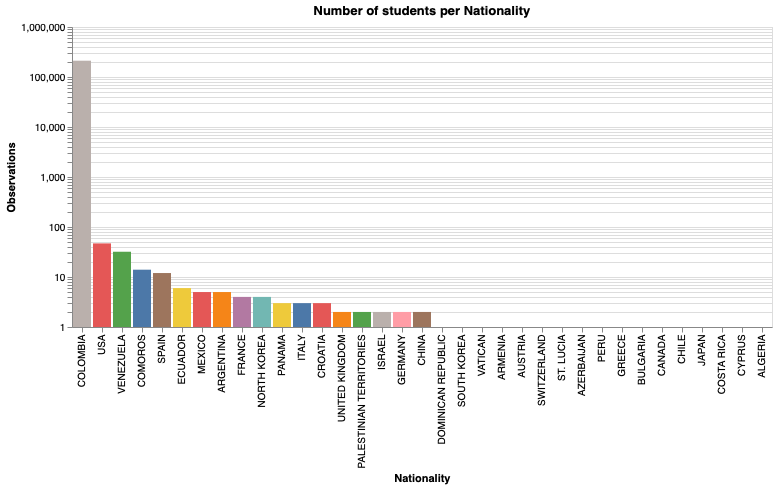

In [18]:
# Nationality
source = df_eng.groupby('your_nationality').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_nationality'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_nationality', sort=source_order, title="Nationality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_nationality', legend=None)
).properties(
    title = "Number of students per Nationality"
)

## Students by Gender

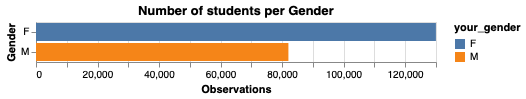

In [19]:
# Gender
source = df_eng.groupby('your_gender').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('your_gender', title="Gender"),
    alt.Color('your_gender')
).properties(
    title = "Number of students per Gender"
)

## Students by Birthdate

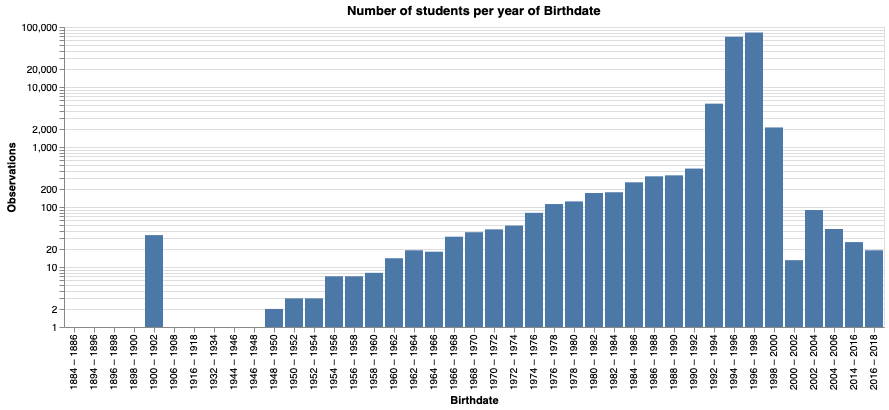

In [20]:
# Birthdate
# pd.DataFrame([pd.to_datetime(df_eng.your_birthdate, errors = 'coerce').dt.to_period('m')]).T
years = [i.year for i in pd.to_datetime(df_eng['your_birthdate'], format='%d/%m/%Y', errors = 'coerce')]
df_hbd = pd.concat([pd.DataFrame(years), df_eng], axis=1, join="inner").rename(columns={0:'your_year_birthdate'})

source = df_hbd.groupby('your_year_birthdate').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('your_year_birthdate:O', title="Birthdate", bin=alt.Bin(maxbins=100)),
    alt.Y('obs', scale=alt.Scale(type='log'), title="Observations")
).properties(
    title = "Number of students per year of Birthdate"
)

## Student Foreigners

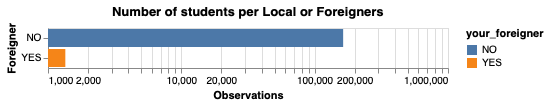

In [21]:
# Foreigners
source = df_eng.groupby('your_foreigner').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_foreigner', title="Foreigner"),
    alt.Color('your_foreigner')
).properties(
    title = "Number of students per Local or Foreigners"
)

## Students by Marital Status

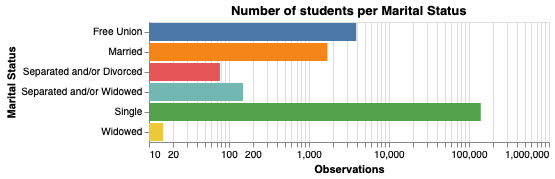

In [22]:
# Marital Status
source = df_eng.groupby('your_marital_status').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_marital_status', title="Marital Status"),
    alt.Color('your_marital_status', legend=None),
    tooltip=['your_marital_status', 'obs']
).properties(
    title = "Number of students per Marital Status"
)

## Students by Residence Country

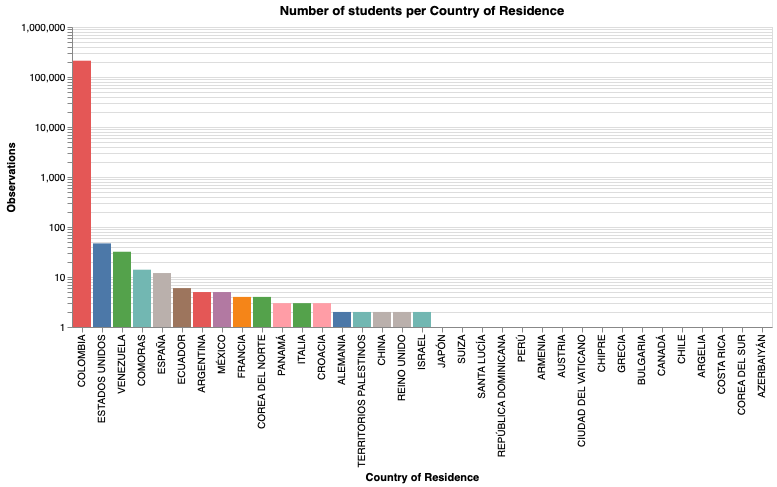

In [23]:
# Country residence
source = df_eng.groupby('your_country_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_country_resides'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_country_resides', sort=source_order, title="Country of Residence"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_country_resides', legend=None)
).properties(
    title = "Number of students per Country of Residence"
)

## Students by Ethnicity

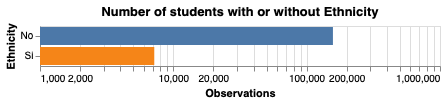

In [24]:
# Ethnicity
source = df_eng.groupby('your_have_ethnicity').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_have_ethnicity', title="Ethnicity"),
    alt.Color('your_have_ethnicity', legend=None),
    tooltip=['your_have_ethnicity', 'obs']
).properties(
    title = "Number of students with or without Ethnicity"
)

## Students by Department of Residence

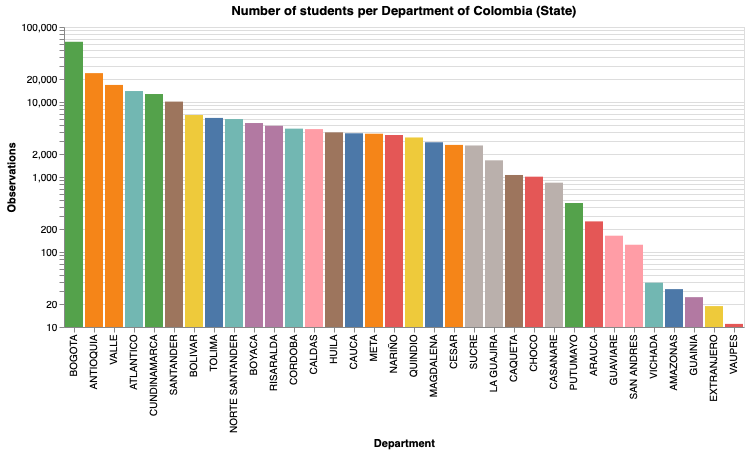

In [25]:
# Department of residence (Colombia states)
source = df_eng.groupby('your_dept_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_dept_resides'])

alt.Chart(source).mark_bar().encode(
    alt.X('your_dept_resides', sort=source_order, title="Department"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_dept_resides', legend=None),
    tooltip=['your_dept_resides', 'obs']
).properties(
    title = "Number of students per Department of Colombia (State)"
)

## Students by High School Degree

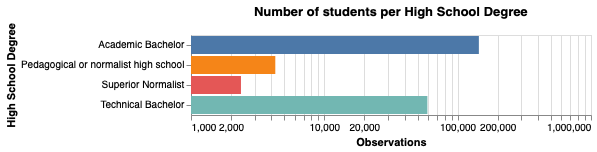

In [26]:
# High School Degree
source = df_eng.groupby('your_high_school_degree').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_high_school_degree', title="High School Degree"),
    alt.Color('your_high_school_degree', legend=None),
    tooltip=['your_high_school_degree', 'obs']
).properties(
    title = "Number of students per High School Degree"
)

## Students by Tuition

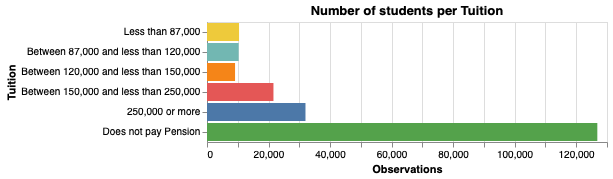

In [27]:
# Tuition
source = df_eng.groupby('your_tuition').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = ['Less than 87,000', 'Between 87,000 and less than 120,000', 'Between 120,000 and less than 150,000',
                'Between 150,000 and less than 250,000', '250,000 or more', 'Does not pay Pension']

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),#, scale=alt.Scale(type='log')),
    alt.Y('your_tuition', sort=source_order, title="Tuition"),
    alt.Color('your_tuition', legend=None),
    tooltip=['your_tuition', 'obs']
).properties(
    title = "Number of students per Tuition"
)


## Students by Municipality

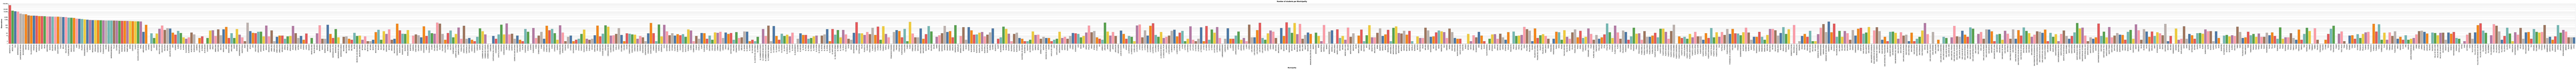

In [28]:
# Municipality
source = df_eng.groupby('your_municipality_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = list(source.sort_values(by=['obs'], ascending=False)['your_municipality_resides'].head(50))

alt.Chart(source).mark_bar().encode(
    alt.X('your_municipality_resides', sort=source_order, title="Municipality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_municipality_resides', legend=None),
    tooltip=['your_municipality_resides', 'obs']
).properties(
    title = "Number of students per Municipality"
)

In [29]:
# Separating the scores into respective lists

marks = [
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11', 
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

saber_marks = [ 
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11',
 ]

saber_pro_marks = [
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

In [30]:
# Adding column of total saber and saber pro scores

saber['total_saber_score'] = saber[saber_marks].sum(axis=1)
saber['total_saber_pro_score'] = saber[saber_pro_marks].sum(axis=1)

In [31]:
saber.head()

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,your_have_ethnicity,your_dept_resides,your_dept_code_resides,your_municipality_resides,your_municipality_code_resides,your_high_school_degree,your_year_exam_sb11,your_semester_exam__b11,your_percentage_credits_approved,your_tuition_cost_university,your_tuition_pymt_scholarship,your_tuition_pymt_credit,your_tuition_pymt_parents,your_tuition_pymt_yourself,your_i_take_course_preparation,your_course_teacher_ies,your_course_external_support_ies,your_course_external_ies,your_simulation_type_icfes,your_activity_strengths_areas,your_activity_strengths_generic,your_on_semester,fami_current_household_type,fami_is_the_head_family,fami_econ_dependents,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,fami_father_work,fami_mother_work,fami_housing_stratum,fami_social_stratum_sisben_y,fami_internet,fami_computer,fami_have_oven,fami_automobile,fami_fridge,fami_mobile,fami_num_books,fami_landline_phone,fami_monthly_family_income,your_works_currently,inst_institution_code,inst_institution_name,your_prgm_academic,your_prgm_academic_snies,group_reference,your_prgm_municipality_code,your_prgm_municipality,your_prgm_department,your_prgm_academic_level,your_prgm_method,your_undergraduate_core,your_inst_municipality_code,your_inst_municipality,your_inst_department,inst_character_academic,inst_origin,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro,your_state_research,your_inst_department_code,your_type_of_document.1,your_nationality.1,your_gender.1,your_birthdate.1,period.1,your_consecutive.1,your_student.1,your_country_resides.1,your_dept_resides.1,your_dept_code_resides.1,your_municipality_resides.1,your_municipality_code_resides.1,your_area_residse,your_tuition,your_times_took_exam,fami_father_education.1,fami_mother_education.1,fami_father_occupation.1,fami_mother_occupation.1,fami_housing_stratum.1,fami_social_stratum_sisben,fami_house_members,fami_house_rooms,fami_house_floor,fami_internet.1,fami_computer.1,fami_washer,fami_microwave,fami_oven,fami_automobile.1,fami_dvd,fami_fridge.1,fami_mobile.1,fami_landline_phone.1,your_currently_working,your_background,your_expectations,cole_saber_11_icfes_code,cole_saber_11_icfes_dane,cole_saber_11_icfes_name,cole_type,cole_nature,cole_calendar,cole_bilingual,cole_character,cole_dane_code_campus,cole_name_campus,cole_main_campus,cole_area_location,cole_journey,cole_municipality_code_location,cole_municipality_location,cole_dept_code_location,cole_dept_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11,total_saber_score,total_saber_pro_score
0,TI,COLOMBIA,M,30/07/1996,NaN,20134,EK201340233804,Single,STUDENT,COLOMBIA,NaN,BOYACA,15.0,GUATEQUE,15322.0,Technical Bachelor,2013.0,1st semester,Doesn't follow the credit system,Did not pay tuition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,It is habitual or permanent,No,None,Undergraduate Degree complete,Middle School complete,Profesional independiente,Profesional independiente,NaN,NaN,Stratum 3,Not classified by SISBEN,Si,No,Si,No,Si,Si,NaN,No,Between 3 and less than 5 SMLV,No,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA,TECNOLOGÍA EN CONTABILIDAD Y FINANZAS,91157.0,TECNOLOGICO EN ADMINISTRACIÓN Y TURISMO,11001,BOGOTÁ D.C.,BOGOTA,TECHNOLOGY,DISTANCE,PUBLIC ACCOUNTING,11001,BOGOTÁ D.C.,BOGOTA,TECHNOLOGICAL INSTITUTION,OFFICIAL NATIONAL LEVEL,9.6,8.3,8.2,9.4,9.4,TO POST,11,TI,COLOMBIA,M,30/07/1996,20122,SB11201220401680,STUDENT,COLOMBIA,BOYACA,15.0,GUATEQUE,15322.0,Head of Municipality,Does not pay Pension,NaN,Graduate Degree,Midd

In [32]:
total_marks = ['total_saber_score', 'total_saber_pro_score']

# Scores by Municipality Analysis

#### This visualization aims to present student distribution across municipalities. 

##### Note that some Municipalities are not as represented as the others, so municipalities that do not reach the 50th percentile will be dropped to avoid municipalities without enough data points. 

In [33]:
saber_municipality = saber.copy()

In [34]:
saber_municipality_score = saber_municipality.groupby("your_municipality_resides").agg(['mean', 'count'])[total_marks]

In [35]:
threshold = saber_municipality['your_municipality_resides'].value_counts().describe()['50%']
print("The 50th percentile are municipalities that have {} instances in the dataset".format(threshold))

The 50th percentile are municipalities that have 15.0 instances in the dataset


In [36]:
saber_municipality_score = saber_municipality_score[saber_municipality_score['total_saber_score']['count'] > threshold]

In [37]:
top_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

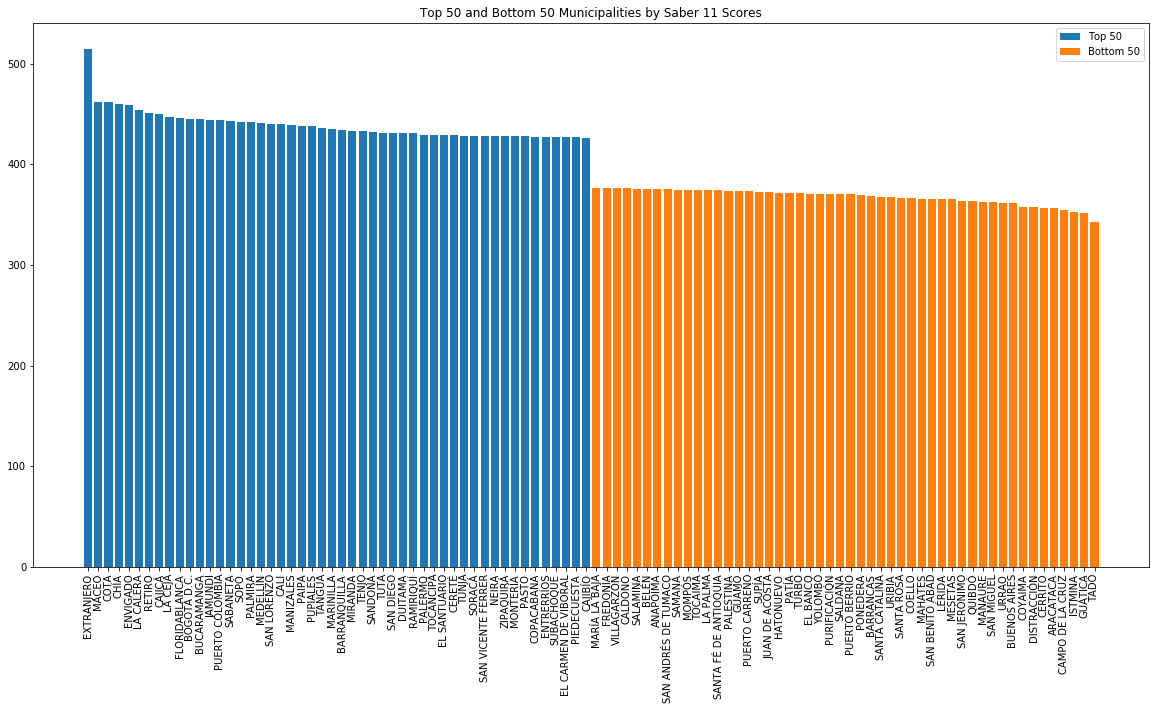

In [38]:
plt.figure(figsize=(20,10))
plt.bar(top_50_saber.index, top_50_saber, label = 'Top 50')
plt.bar(bot_50_saber.index, bot_50_saber, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend()
plt.title('Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

In [39]:
top_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

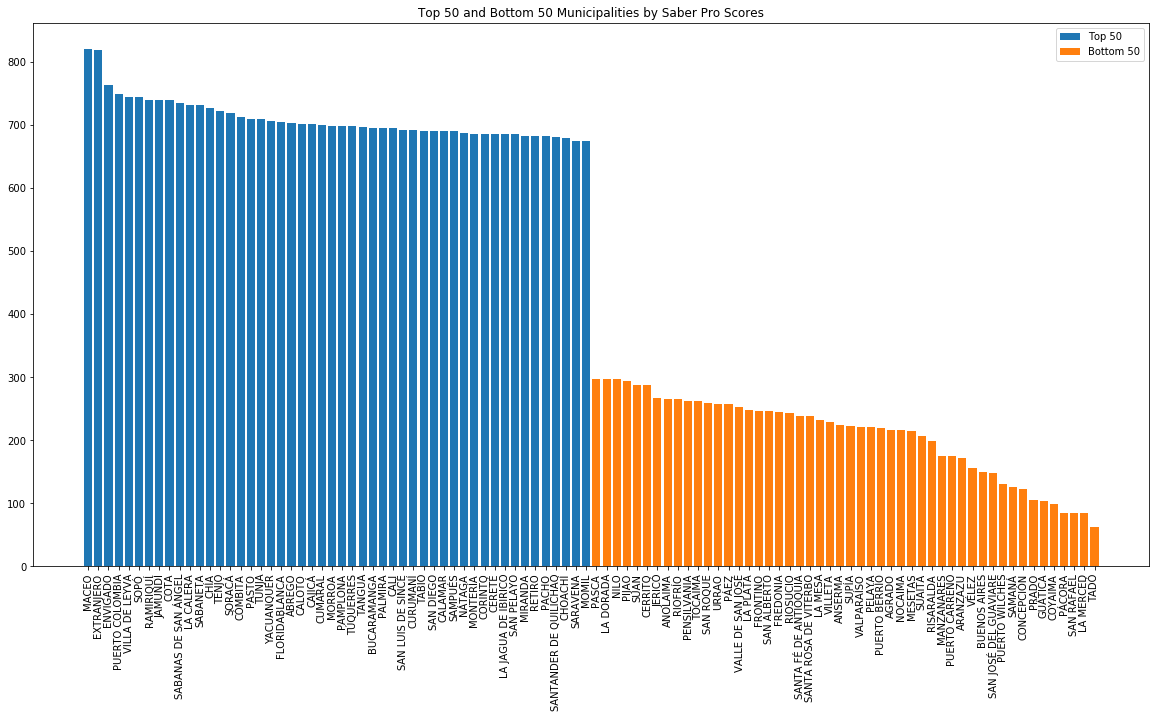

In [40]:
plt.figure(figsize=(20,10))
plt.bar(top_50_saber_pro.index, top_50_saber_pro, label = 'Top 50')
plt.bar(bot_50_saber_pro.index, bot_50_saber_pro, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend()
plt.title('Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

#### From the two graphs, we see that there is a great mean score difference between the Top 50 and Bottom 50 Municipalities. There is an even greater difference in Saber Pro. We will explore these differences by first examining the factors that affect mean scores. 

In [41]:
saber_top_50_municipalities = top_50_saber.index.to_list()
saber_bot_50_municipalities = bot_50_saber.index.to_list()
saber_pro_top_50_municipalities = top_50_saber_pro.index.to_list()
saber_pro_bot_50_municipalities = bot_50_saber_pro.index.to_list()

In [42]:
saber_top_50_municipalities_as_set = set(saber_top_50_municipalities)
saber_top_50_intersection = saber_top_50_municipalities_as_set.intersection(saber_pro_top_50_municipalities)
saber_top_50_intersection_list = list(saber_top_50_intersection)

print("\n There are {} municipalities in the saber and saber pro Top 50.".format(len(saber_top_50_intersection_list)))
print("\n These municipalities are {}".format(saber_top_50_intersection_list))

saber_bot_50_municipalities_as_set = set(saber_bot_50_municipalities)
saber_bot_50_intersection = saber_bot_50_municipalities_as_set.intersection(saber_pro_bot_50_municipalities)
saber_bot_50_intersection_list = list(saber_bot_50_intersection)

print("\n There are {} municipalities in the saber and saber pro Bot 50. \n".format(len(saber_bot_50_intersection_list)))
print("\n These municipalities are {}".format(saber_bot_50_intersection_list))


 There are 26 municipalities in the saber and saber pro Top 50.

 These municipalities are ['LA CALERA', 'PASTO', 'BUCARAMANGA', 'MIRANDA', 'SOPÓ', 'TUNJA', 'RAMIRIQUÍ', 'JAMUNDÍ', 'PUERTO COLOMBIA', 'SORACÁ', 'FLORIDABLANCA', 'SABANETA', 'SAN DIEGO', 'MACEO', 'TANGUA', 'TENJO', 'COTA', 'CHÍA', 'PALMIRA', 'CERETÉ', 'CAJICÁ', 'ENVIGADO', 'MONTERÍA', 'RETIRO', 'CALI', 'EXTRANJERO']

 There are 14 municipalities in the saber and saber pro Bot 50. 


 These municipalities are ['COYAIMA', 'FREDONIA', 'SANTA FÉ DE ANTIOQUIA', 'CERRITO', 'PUERTO CARREÑO', 'SAMANÁ', 'URRAO', 'BUENOS AIRES', 'SUPÍA', 'PUERTO BERRÍO', 'GUÁTICA', 'MESETAS', 'TOCAIMA', 'TADÓ']


We will be taking note of these municipalities as we explore the factors that affect mean saber and saber pro scores. 

## Scores by Social Factors

This section aims to visualize whether certain social factors have an effect to mean scores.

In [43]:
saber.columns.to_list()

['your_type_of_document',
 'your_nationality',
 'your_gender',
 'your_birthdate',
 'your_foreigner',
 'period',
 'your_consecutive',
 'your_marital_status',
 'your_student',
 'your_country_resides',
 'your_have_ethnicity',
 'your_dept_resides',
 'your_dept_code_resides',
 'your_municipality_resides',
 'your_municipality_code_resides',
 'your_high_school_degree',
 'your_year_exam_sb11',
 'your_semester_exam__b11',
 'your_percentage_credits_approved',
 'your_tuition_cost_university',
 'your_tuition_pymt_scholarship',
 'your_tuition_pymt_credit',
 'your_tuition_pymt_parents',
 'your_tuition_pymt_yourself',
 'your_i_take_course_preparation',
 'your_course_teacher_ies',
 'your_course_external_support_ies',
 'your_course_external_ies',
 'your_simulation_type_icfes',
 'your_activity_strengths_areas',
 'your_activity_strengths_generic',
 'your_on_semester',
 'fami_current_household_type',
 'fami_is_the_head_family',
 'fami_econ_dependents',
 'fami_father_education',
 'fami_mother_education',
 

In [44]:
total_marks = ['total_saber_score', 'total_saber_pro_score']

social_factors = ['your_gender', 'your_i_take_course_preparation', 'your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                  'your_simulation_type_icfes', 'your_activity_strengths_generic', 'fami_current_household_type', 'fami_housing_stratum', 'fami_social_stratum_sisben_y', 'fami_monthly_family_income', 'fami_internet',
                  'fami_computer', 'fami_have_oven', 'fami_automobile', 'fami_fridge', 'fami_mobile', 'fami_num_books', 'fami_landline_phone', 'fami_father_education', 'fami_mother_education',
                  'fami_father_occupation', 'fami_mother_occupation', 'fami_father_work','fami_mother_work']

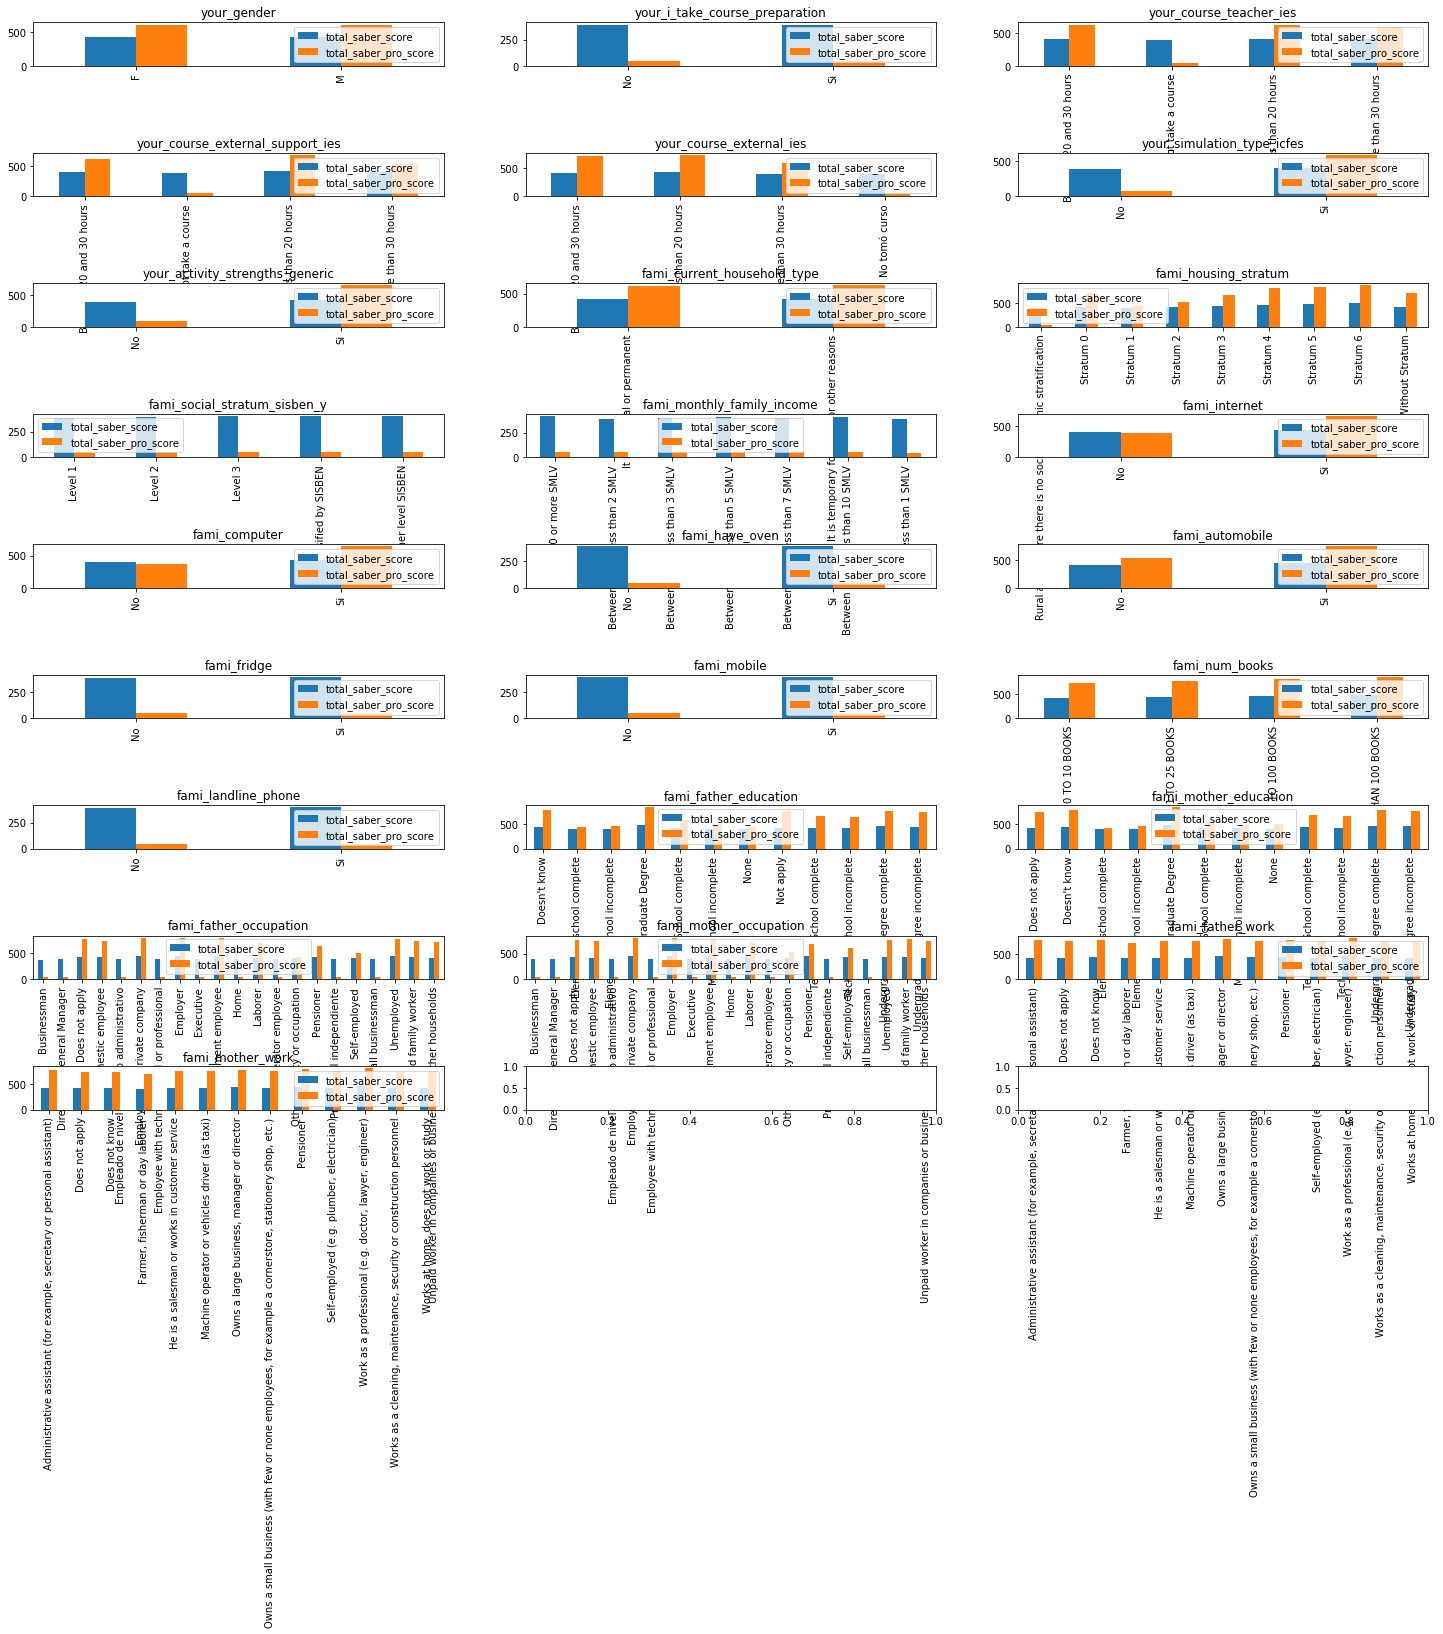

In [45]:
cols = 3
rows = len(social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(25,20))
plt.subplots_adjust(hspace = 2.0)

axe=axs.ravel()

counter = 0

for i in social_factors:
    saber.groupby(saber[i]).mean()[total_marks].plot.bar(ax=axe[counter], title=i, xlabel="")
    counter += 1

*Apologies for the graphing, this is for determination purposes so a graph that contains all needed graphs at once was used*

Based on the results of the graphs above, the following insights are gained:

*Note that the insights are for the MEAN TOTAL SCORES. Insights may differ per subject area or the like. Nonetheless, for overall mean scores for Saber 11 and Saber Pro, these insights are generated.*
  
**For Saber 11 ICFES**
- There is no correlation amongst all the social factors and Saber 11 scores. The scores remain consistent throughout 'Yes' or 'No' answers and other categorical options like 'Occupation' and 'Education of parents. There are no stark outliers observered. 
- Since there are no stark outliers observed from the 'mean', other levels of aggregations are recommended. 

**For Saber 11 Pro**
- The following features have a considerable effect to Saber 11 Pro scores. 
    - Took a  special preparation test?
    - Took another test that's not lectured by the government?
    - Did you did a simulacrum
    - Generic Preparation for Test
    - House Stratum
    - Family has internet?
    - Do you have a computer?
    - Do you have a car?
    - Father's education
    - Mother's education
    - Father's Occupation
    - Mother's Job occupation
  
**For Saber 11 and Saber 11 Pro**
- 'Did student took preparation test' appears to not matter. Whether the student took or not does not change his/her scores.
- 'Sisben level' appears to not matter. The sisben level does not affect overall scores. 
- 'Mensual income' appears to not matter. The monthly income level does not affect overall scores.
- 'Current household type' appears to not matter. This does not affect overall scores.
- kiln, fridge, cellphone, books, and cellphone appear to not matter. Whether one has them or not does not affect overall scores. 

**Now we have found out Saber 11 Pro has the more variance visually, we tie this back to the municipality question: Are the high and low scores of these municipalities affected by these social factors?**

In [46]:
saber_pro_top_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_top_50_municipalities)]
print("There are {} datapoints in the saber dataset for all top 50 municipalities".format(saber_pro_top_50.shape[0]))

saber_pro_bot_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_bot_50_municipalities)]
print("There are {} datapoints in the saber dataset for all bot 50 municipalities".format(saber_pro_bot_50.shape[0]))

There are 33924 datapoints in the saber dataset for all top 50 municipalities
There are 2258 datapoints in the saber dataset for all bot 50 municipalities


In [47]:
relevant_social_factors = ['your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                           'your_simulation_type_icfes', 'your_activity_strengths_generic', 'fami_housing_stratum', 'fami_internet',
                           'fami_computer', 'fami_automobile', 'fami_father_education', 'fami_mother_education',
                           'fami_father_work','fami_mother_work']

## Top 50 Municipalities Saber Pro

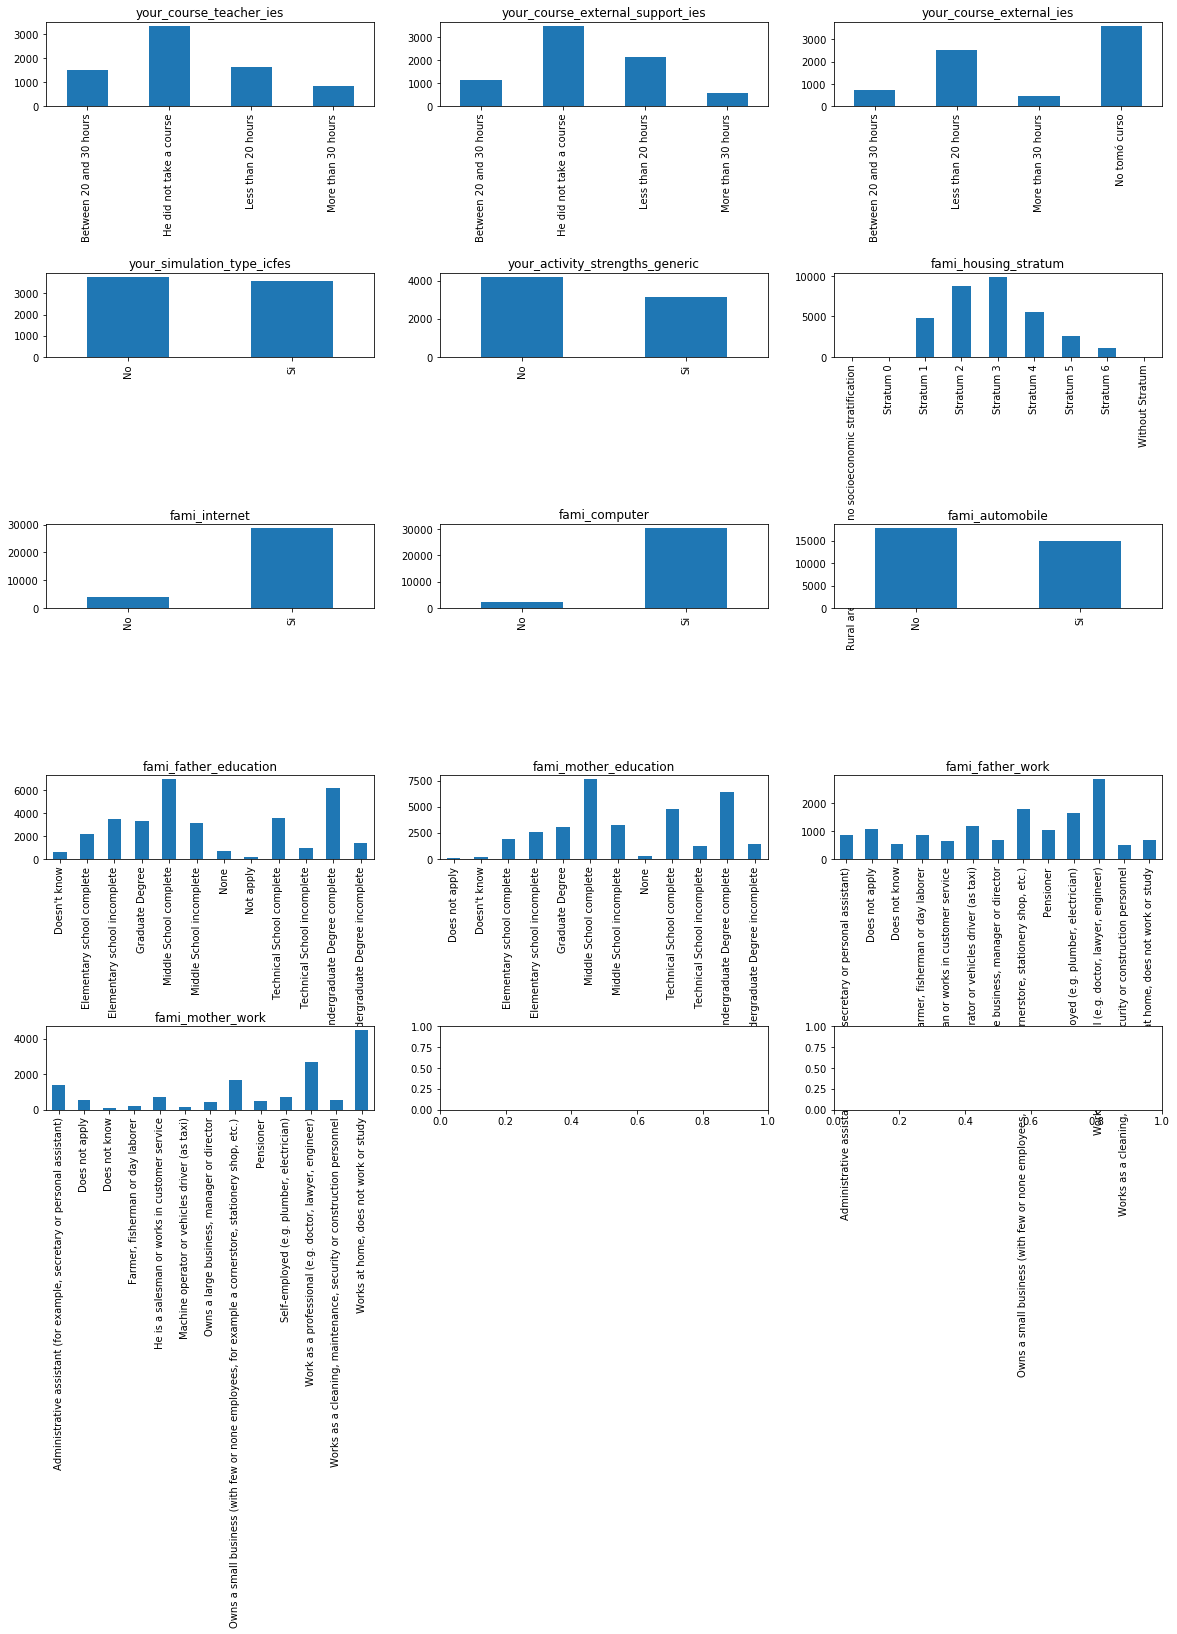

In [48]:
cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 2.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    saber_pro_top_50.groupby(saber_pro_top_50[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter], title=i, xlabel="")
    counter += 1

## Bottom 50 Municipalities Saber Pro

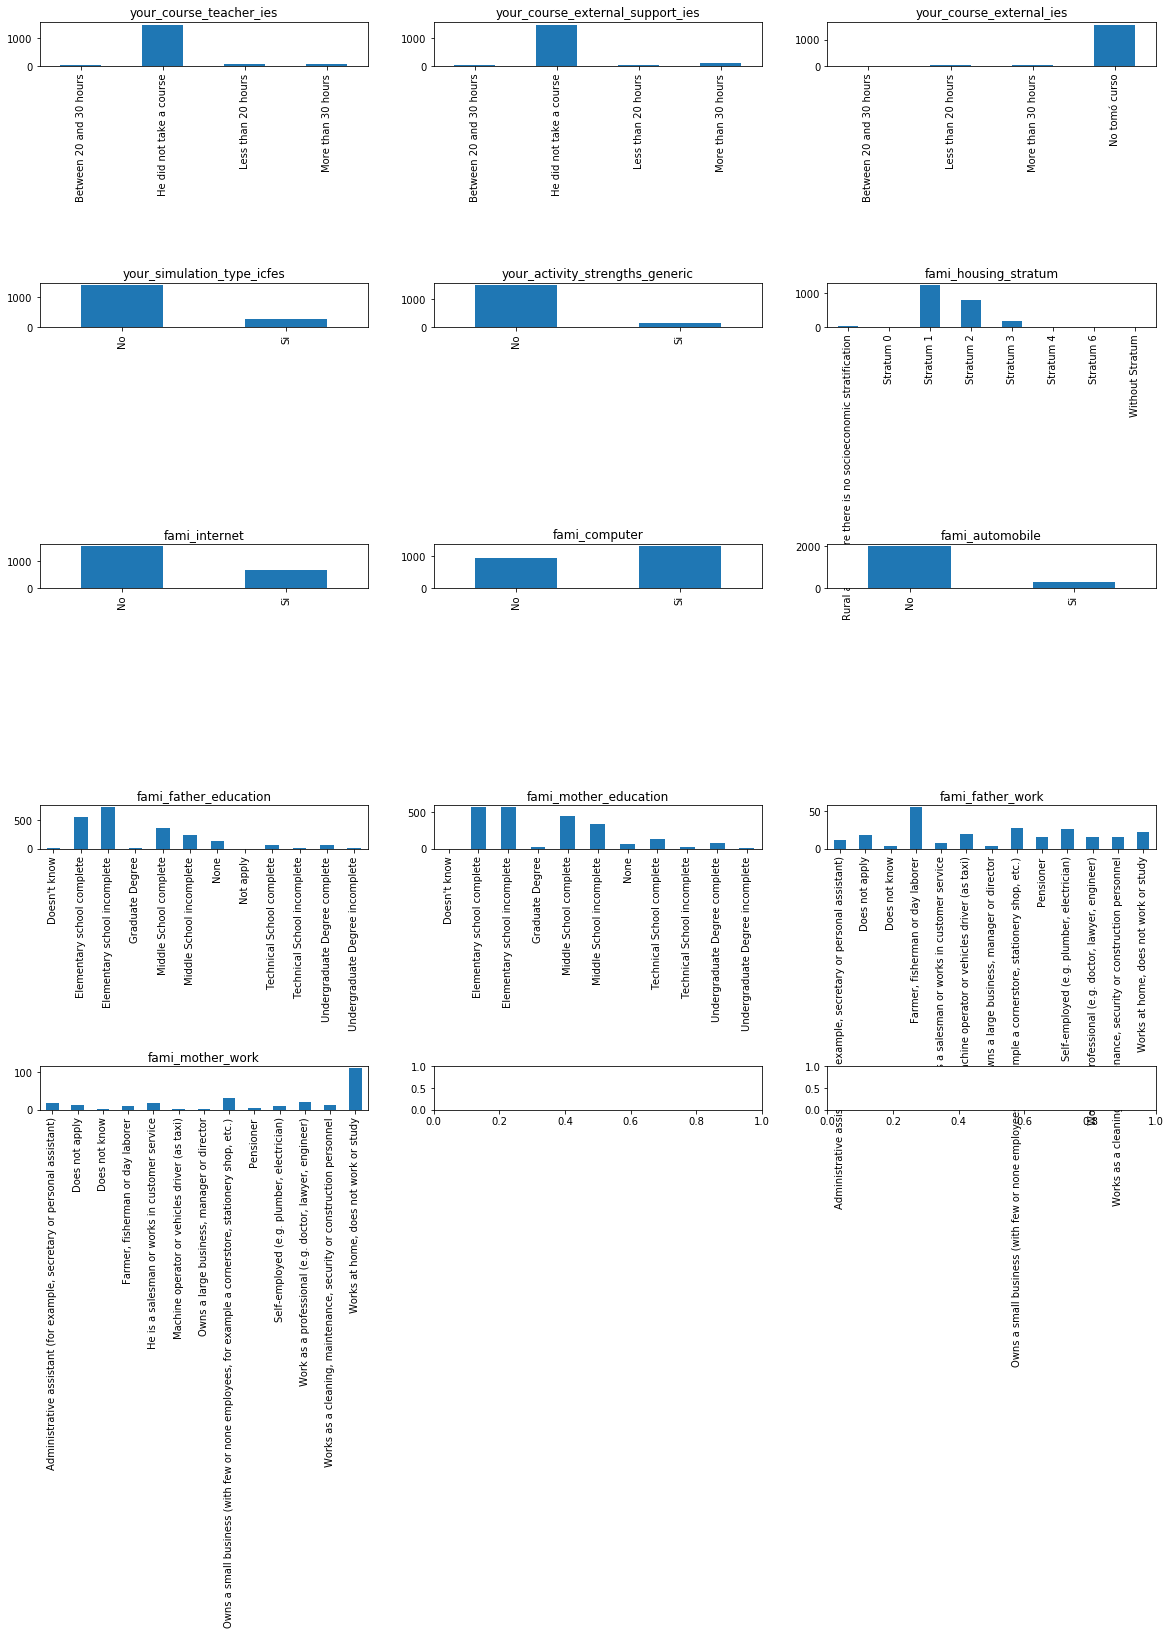

In [49]:
cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 5.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    saber_pro_bot_50.groupby(saber_pro_bot_50[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter], title=i, xlabel="")
    counter += 1

# Insights

### For the Top 50 Municipalities in terms of Saber Pro scores:
1. With regard to taking special preparation tests, simulacrums, and the generic preparation. It appears these factors do not affect as much the overall saber scores of the students as the highest number for each feature still correspond to not taking these tests. 
2. Majority of the students have computers and internet at home. These two features then are relevant to the dataset. 
3. Both the mother and father of students belonging to these municipalities have, in majority, finished at least secondary education. 
4. The father and mother of students belonging to these municipalities have, in majority, have employment belonging to Obrero o empleyado and trabajador por cuenta propia. 

### For the Bottom 50 Municipalities in terms of Saber Pro scores:
1. Majority of the students belonging to these municipalities were not able to take any preparation tests and it led to lower Saber Pro scores. 
2. Majority of the students have computers but no access to the internet. This may cause a decrease in Saber pro scores. 
3. Majority of the students' families belong to Estrata 1 house level, the lowest house levels in Colombia. 
4. A lot of parents in these municipalities have not finished primary school, and at maximum, only completed Secondary School. This shows a stark divide between the top 50 and the bottom 50. 
5. The father's of students belong to the class of pequeno empresário and trabajador por cuenta propia. However, majority of the mother's have jobs at Hogar (Home) which indicates the father is the one earning unlike in Top 50 municipalities where both parents are earning. 

Overall, based on the current analysis, we see that the factors of taking preparation tests, father's education, mother's education, father's occupation, mother's occupation, house stratum, and access to the internet have a greater impact of decreasing scores. Without these factors, Saber Pro scores of students decrease. **There is, then, a stark divide shown between the Top and Bottom Municipalities when it comes to Saber Pro scores.** 

### More Questions October 2, 2021:

1. Formulate more questions to visualize the colombian student population.
2. Determine whether there are more social factors that affect students test scores. 
3. Relate these social factors to whether the Saber scores become accurate to the current academic program of the student. Ask the question: Are these social factors hindering the student in pursuing the program to which he is most logically belonging to?

## Scores by High School Education

#### Question: Does high school education affect total scores?

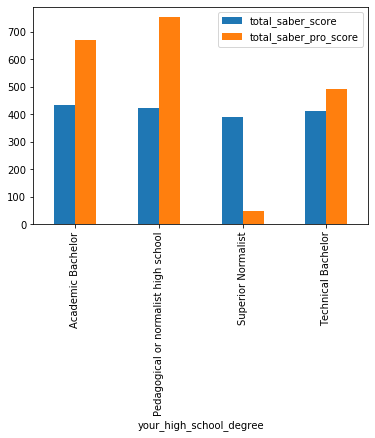

In [50]:
saber.groupby('your_high_school_degree')[total_marks].mean().plot.bar()

It appears students who had a high school degree of superior normalist and technical bachelor have substantially lower saber pro scores. Why? 

### Superior Normalist

In [51]:
hs_degree = ['Superior Normalist']
superior_normalist_saber_pro = saber.loc[saber['your_high_school_degree'].isin(hs_degree)]

In [52]:
superior_normalist_saber_pro

,your_type_of_document,your_nationality,your_gender,your_birthdate,your_foreigner,period,your_consecutive,your_marital_status,your_student,your_country_resides,your_have_ethnicity,your_dept_resides,your_dept_code_resides,your_municipality_resides,your_municipality_code_resides,your_high_school_degree,your_year_exam_sb11,your_semester_exam__b11,your_percentage_credits_approved,your_tuition_cost_university,your_tuition_pymt_scholarship,your_tuition_pymt_credit,your_tuition_pymt_parents,your_tuition_pymt_yourself,your_i_take_course_preparation,your_course_teacher_ies,your_course_external_support_ies,your_course_external_ies,your_simulation_type_icfes,your_activity_strengths_areas,your_activity_strengths_generic,your_on_semester,fami_current_household_type,fami_is_the_head_family,fami_econ_dependents,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,fami_father_work,fami_mother_work,fami_housing_stratum,fami_social_stratum_sisben_y,fami_internet,fami_computer,fami_have_oven,fami_automobile,fami_fridge,fami_mobile,fami_num_books,fami_landline_phone,fami_monthly_family_income,your_works_currently,inst_institution_code,inst_institution_name,your_prgm_academic,your_prgm_academic_snies,group_reference,your_prgm_municipality_code,your_prgm_municipality,your_prgm_department,your_prgm_academic_level,your_prgm_method,your_undergraduate_core,your_inst_municipality_code,your_inst_municipality,your_inst_department,inst_character_academic,inst_origin,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro,your_state_research,your_inst_department_code,your_type_of_document.1,your_nationality.1,your_gender.1,your_birthdate.1,period.1,your_consecutive.1,your_student.1,your_country_resides.1,your_dept_resides.1,your_dept_code_resides.1,your_municipality_resides.1,your_municipality_code_resides.1,your_area_residse,your_tuition,your_times_took_exam,fami_father_education.1,fami_mother_education.1,fami_father_occupation.1,fami_mother_occupation.1,fami_housing_stratum.1,fami_social_stratum_sisben,fami_house_members,fami_house_rooms,fami_house_floor,fami_internet.1,fami_computer.1,fami_washer,fami_microwave,fami_oven,fami_automobile.1,fami_dvd,fami_fridge.1,fami_mobile.1,fami_landline_phone.1,your_currently_working,your_background,your_expectations,cole_saber_11_icfes_code,cole_saber_11_icfes_dane,cole_saber_11_icfes_name,cole_type,cole_nature,cole_calendar,cole_bilingual,cole_character,cole_dane_code_campus,cole_name_campus,cole_main_campus,cole_area_location,cole_journey,cole_municipality_code_location,cole_municipality_location,cole_dept_code_location,cole_dept_location,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_english_saber_11_category,optative_field_saber_11,score_optative_saber_11,optative_category_saber_11,total_saber_score,total_saber_pro_score
306,TI,COLOMBIA,M,24/08/1994,NaN,20143,EK201430174278,Single,STUDENT,COLOMBIA,NaN,NARIÑO,52.0,SAN PABLO,52693.0,Superior Normalist,2012.0,2nd semester,NaN,NaN,NaN,NaN,NaN,NaN,No,He did not take a course,He did not take a course,No tomó curso,No,No,No,NaN,It is temporary for study or other reasons,No,None,Elementary school incomplete,Middle School complete,Self-employed,Other activity or occupation,NaN,NaN,Stratum 1,Level 3,No,Si,No,No,Si,Si,NaN,No,Less than 1 SMLV,No,11890,NORMAL SUPERIOR SAGRADO CORAZON DE JESUS-SAN P...,CICLO COMPLEMENTARIO DE ESCUELAS NORMALES SUPE...,NaN,NORMALES SUPERIORES,52693,SAN PABLO,NARIÑO,TECHNOLOGY,IN PERSON,SUPERIOR NORMALS,52693,SAN PABLO,NARIÑO,NORMAL SUPERIOR SCHOOL,SPECIAL REGIME,8.8,8.5,8.1,9.9,8.40,TO POST,52,TI,COLOMBIA,M,24/08/1994,20122,SB11201220585020,STUDENT,COLOMBIA,CAUCA,19.0,BOLÍVAR,19100.0,Rural area,Does not pay Pension,NaN,Middle School complete,Elementary school incomplete,Self-employed,

In [53]:
relevant_social_factors = ['your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                           'your_simulation_type_icfes', 'your_activity_strengths_generic', 'fami_housing_stratum', 'fami_internet',
                           'fami_computer', 'fami_automobile', 'fami_father_education', 'fami_mother_education',
                           'fami_father_occupation','fami_mother_occupation']

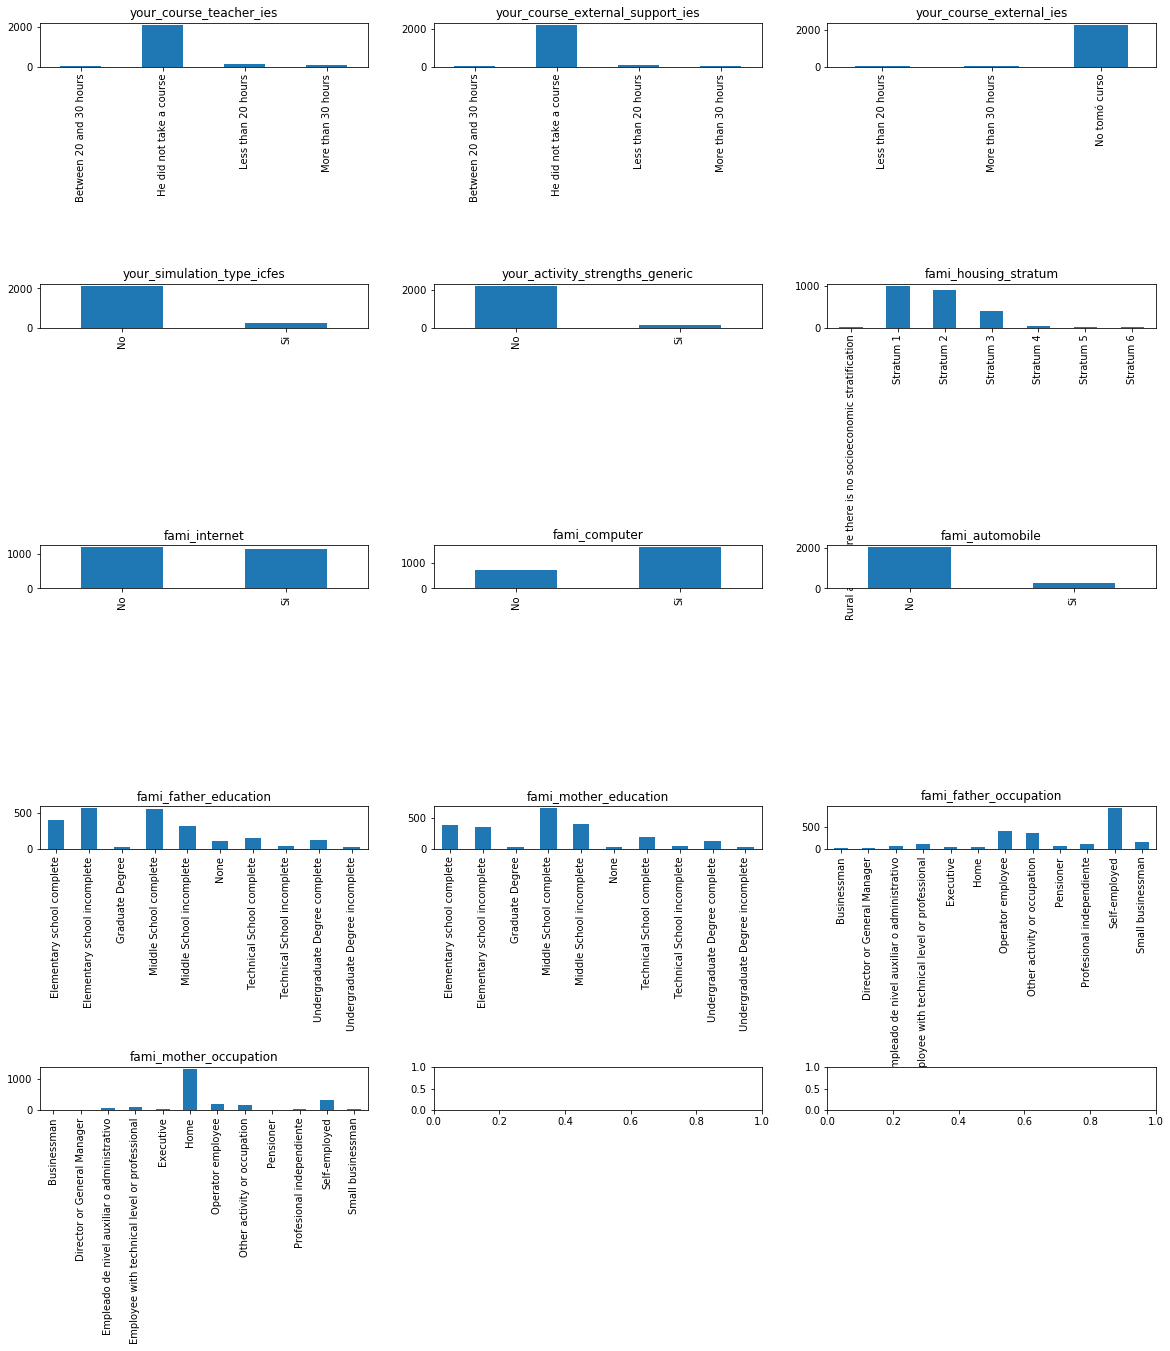

In [54]:
# Since fami mother and father work are all NaNs, use occupation instead

cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 5.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    superior_normalist_saber_pro.groupby(superior_normalist_saber_pro[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter],  title=i, xlabel="")
    counter += 1

### Technical Bachelor

In [55]:
hs_degree = ['Technical Bachelor']
technical_bachelor_saber_pro = saber.loc[saber['your_high_school_degree'].isin(hs_degree)]

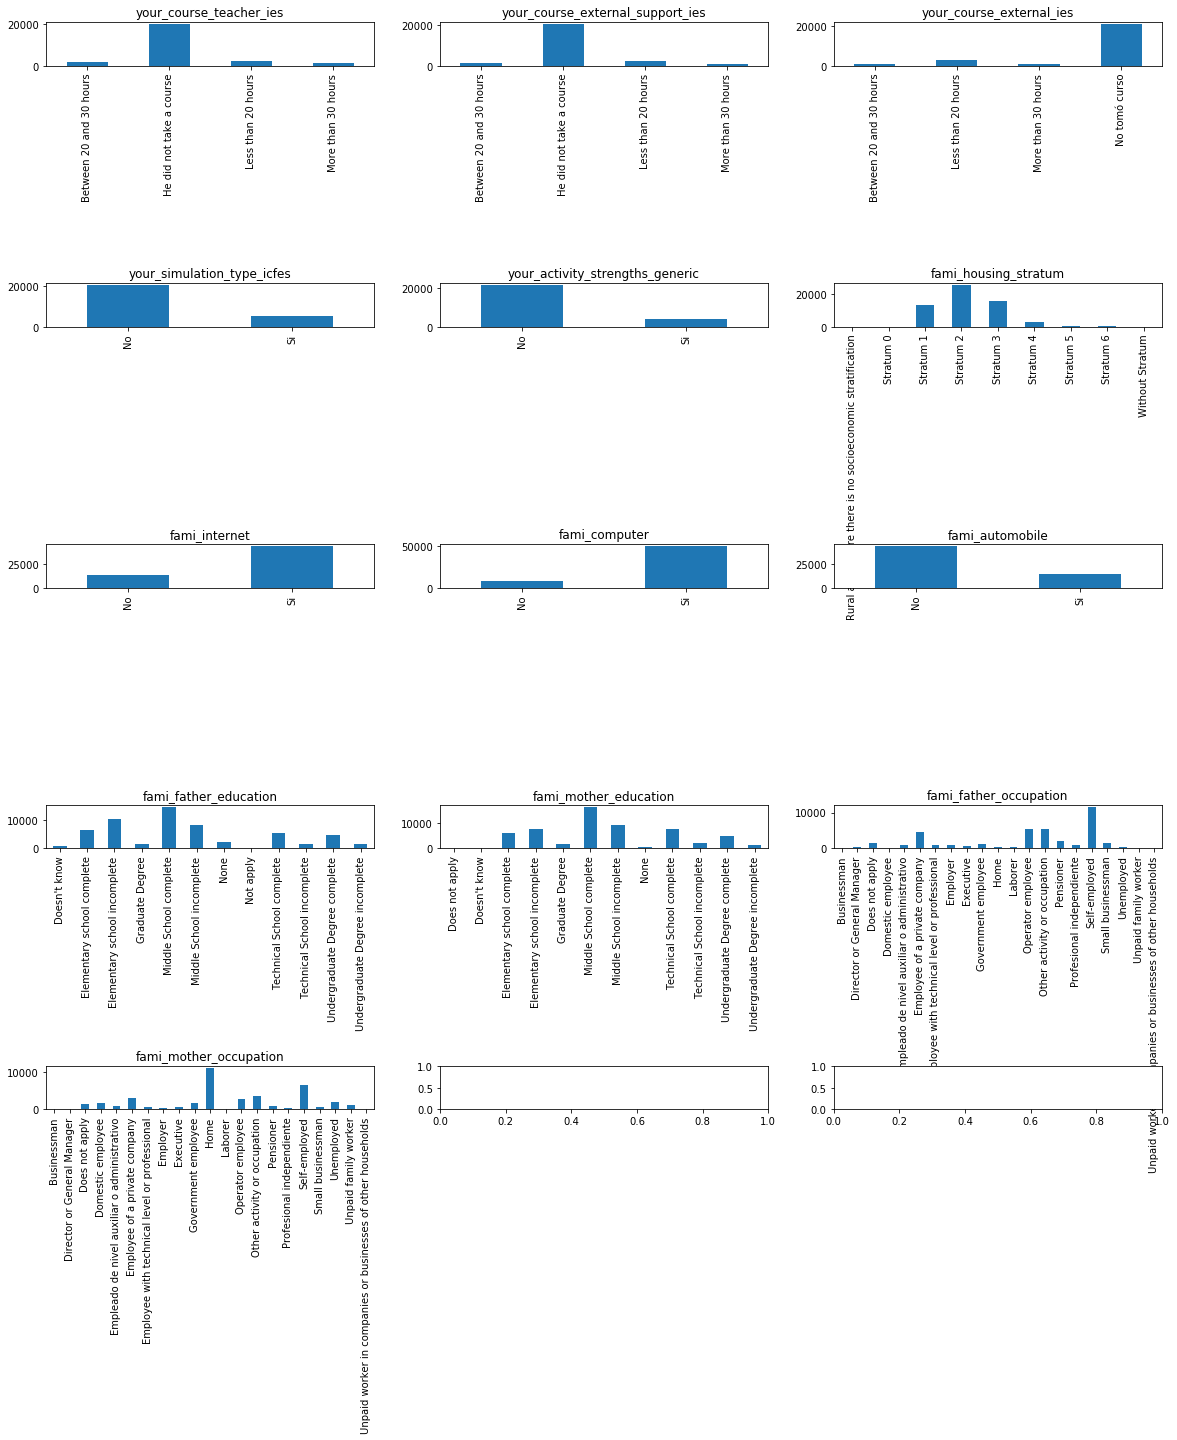

In [56]:
# Since fami mother and father work are all NaNs, use occupation instead

cols = 3
rows = len(relevant_social_factors) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(20,20))
plt.subplots_adjust(hspace = 5.0)

axe=axs.ravel()

counter = 0

for i in relevant_social_factors:
    technical_bachelor_saber_pro.groupby(technical_bachelor_saber_pro[i])['total_saber_pro_score'].count().plot.bar(ax=axe[counter],  title=i, xlabel="")
    counter += 1

### Insights for Superior Normalist

Similar to the insights generated for the bottom 50 municipalities with the exception that students from superior normalist schools have access to the internet, majority of students also did not take preparation tests and live on Stratum 1 housing. Furthermore, majority of their parents finished only up to Elementary and Middle School with the father being self-employed and the mother staying at home. These insights show similarities with the Bottom 50 Municipalities. 

### Insights for Technical Bachelor

Same with Superior Normalist except that majority of students with this high school degre live in Stratum 2 housing.

##### Additional question: Do the municipalities of these students belong to the Bottom 50? 
##### Additional question for municipality analysis: What's the lowest score per municipality? Is there a consistent low score among Saber areas?

## Scores by Undergraduate Core

#### Questions: What's the mean score for every undergraduate core? What are the characteristics of students who belong in the cores with highest and lowest scores?

In [57]:
print("There are {} unique undergraduate cores in this dataset".format(saber['your_undergraduate_core'].nunique()))

There are 63 unique undergraduate cores in this dataset


In [58]:
print("The top 10 undergraduate cores based on number of students are \n\n{}".format(saber['your_undergraduate_core'].value_counts().head(10)))

The top 10 undergraduate cores based on number of students are 

ADMINISTRATION                         35790
LAW                                    15263
PUBLIC ACCOUNTING                      14334
EDUCATION                              14219
INDUSTRIAL ENGINEERING                 10660
PSYCHOLOGY                             10518
ENVIRONMENTAL, SANITARY ENGINEERING     8231
UNCLASSIFIED                            8091
CIVIL ENGINEERING                       7736
SOCIAL COMMUNICATION, JOURNALISM        7479
Name: your_undergraduate_core, dtype: int64


Now let's examine the mean scores of students from every undergraduate core. 

In [59]:
sorted_mean_undergraduate_core = saber.groupby("your_undergraduate_core")[total_marks].agg(["mean", "count"]).sort_values(by=("total_saber_pro_score", "mean"), ascending=False).reset_index()
sorted_mean_undergraduate_core

your_undergraduate_core total_saber_score         \
                                                                  mean  count   
0                                            PHISICS        528.387435    191   
1         POLITICAL SCIENCE, INTERNATIONAL RELATIONS        479.516254   2061   
2                         ANTHROPOLOGY, LIBERAL ARTS        485.922886    402   
3          MODERN LANGUAGES, LITERATURE, LINGUISTICS        478.455865    827   
4                                   MATH, STATISTICS        490.619898    392   
5                                           MEDICINE        500.939942   2764   
6                               CHEMICAL ENGINEERING        492.063681   1853   
7                               PHILOSOPHY, THEOLOGY        465.083333    336   
8                         ADMINISTRATIVE ENGINEERING        465.229901    709   
9                             BIOMEDICAL ENGINEERING        463.157197    528   
10                             BIOLOGY, MICROBIOLOGY        464.484132   1607   
11                                               LAW        438.401494  15263   
12                                NUTRITION AND DIET        438.306818    264   
13                  AGROINDUSTRIAL ENGINEERING, FOOD        449.119403    469   
14                              PLASTIC, VISUAL ARTS        457.840951    547   
15                                             MUSIC        482.310811    444   
16                                      BACTERIOLOGY        440.436573    607   
17                                      ARCHITECTURE        453.720081   3969   
18                                GEOGRAPHY, HISTORY        437.035556    675   
19                AGRICULTURAL, FORESTRY ENGINEERING        450.563433    268   
20                               VETERINARY MEDICINE        439.493036   1077   
21                           NUTRITION AND DIETETICS        427.430769    325   
22                  SOCIAL COMMUNICATION, JOURNALISM        435.071266   7479   
23                                 CIVIL ENGINEERING        452.878490   7736   
24                                        PSYCHOLOGY        422.851398  10518   
25                                        ODONTOLOGY        422.665851    817   
26                            ELECTRICAL ENGINEERING        465.816139    979   
27                            INDUSTRIAL ENGINEERING        450.663884  10660   
28                    MINING, METALLURGY ENGINEERING        483.299347   1226   
29                                         THERAPIES        411.675728   2575   
30                                           NURSING        411.531977   3440   
31                         PLASTIC ARTS, VISUAL ARTS        461.390663    814   
32                            SOCIOLOGY, SOCIAL WORK        407.695720   3832   
33  TRAINING RELATED TO THE MILITARY OR POLICE FIELD        417.898810    168   
34                               REPRESENTATIVE ARTS        450.457317    164   
35                          SURGICAL INSTRUMENTATION        403.477099    786   
36                                           ECONOMY        447.872152   7243   
37                                         EDUCATION        405.748576  14219   
38                                       ADVERTISING        428.266802    982   
39                                 OTHER ENGINEERING        459.507143   1120   
40                  AGRONOMIC, LIVESTOCK ENGINEERING        423.447263    749   
41         SPORTS, PHYSICAL EDUCATION AND RECREATION        410.261402    899   
42                                         CHEMISTRY        464.271605    972   
43                                         DENTISTRY        424.774574    763   
44        ELECTRONIC ENGINEERING, TELECOMMUNICATIONS        455.913533   2845   
45          OPTOMETRY, OTHER HEALTH SCIENCE PROGRAMS        405.010989    273   
46               AGROINDUSTRIAL AND FOOD ENGINEERING        437.027484    473   
47                                            DESIGN        

In [60]:
top_10_undergraduate_cores_by_number = saber['your_undergraduate_core'].value_counts().head(10).index.to_list()

In [61]:
top_cores_rank = sorted_mean_undergraduate_core.loc[sorted_mean_undergraduate_core['your_undergraduate_core'].isin(top_10_undergraduate_cores_by_number)]
top_cores_rank.drop('total_saber_score', inplace=True, axis=1)
top_cores_rank

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


your_undergraduate_core total_saber_pro_score       
                                                         mean  count
11                                  LAW            789.474388  15263
22     SOCIAL COMMUNICATION, JOURNALISM            757.250977   7479
23                    CIVIL ENGINEERING            754.936798   7736
24                           PSYCHOLOGY            753.435920  10518
27               INDUSTRIAL ENGINEERING            741.511008  10660
37                            EDUCATION            700.987493  14219
50                       ADMINISTRATION            512.597000  35790
51  ENVIRONMENTAL, SANITARY ENGINEERING            510.305410   8231
54                    PUBLIC ACCOUNTING            452.819047  14334
59                         UNCLASSIFIED            211.816553   8091

We see in the charts about that the top 10 undergraduate cores do not even belong to the cores in which students had the highest mean saber scores. Why?

##### Question: In which municipalities do these students who take up the top 10 undergraduate cores live in?

In [62]:
saber[['your_municipality_resides', 'your_undergraduate_core']]

,your_municipality_resides,your_undergraduate_core
0,GUATEQUE,PUBLIC ACCOUNTING
1,LETICIA,MILITARY OR POLICE TRAINING
2,DOSQUEBRADAS,PUBLIC ACCOUNTING
3,CARTAGENA DE INDIAS,ECONOMY
4,SOACHA,ADMINISTRATION
...,...,...
212005,VALENCIA,CIVIL ENGINEERING
212006,BOGOTÁ D.C.,MEDICINE
212007,CORINTO,ADMINISTRATION
212008,VILLAVICENCIO,INDUSTRIAL ENGINEERING


In [63]:
saber_pro_top_10_undergraduate_cores = saber.loc[saber['your_undergraduate_core'].isin(top_10_undergraduate_cores_by_number)]
saber_pro_top_10_undergraduate_cores.shape

(132321, 144)

In [64]:
top_10_undergraduate_cores_by_municipality = saber.groupby(['your_undergraduate_core', 'your_municipality_resides'])['total_saber_pro_score'].count()

In [65]:
saber.groupby(['your_undergraduate_core', 'your_municipality_resides'])['total_saber_pro_score'].size()

your_undergraduate_core  your_municipality_resides
ADMINISTRATION           ABEJORRAL                     4
                         ACACÍAS                      28
                         ACEVEDO                       2
                         ACHÍ                          3
                         AGRADO                        4
                                                      ..
ZOOTECHNY                VILLAVICENCIO                 5
                         VILLAVIEJA                    1
                         YUMBO                         1
                         ZIPAQUIRÁ                     2
                         ÁBREGO                        1
Name: total_saber_pro_score, Length: 10939, dtype: int64

In [66]:
top_10_undergraduate_cores_by_municipality['ADMINISTRATION'].sort_values(ascending=False).head(10).index

Index(['BOGOTÁ D.C.', 'MEDELLÍN', 'CALI', 'BARRANQUILLA',
       'CARTAGENA DE INDIAS', 'IBAGUÉ', 'PEREIRA', 'BUCARAMANGA', 'MANIZALES',
       'SOACHA'],
      dtype='object', name='your_municipality_resides')

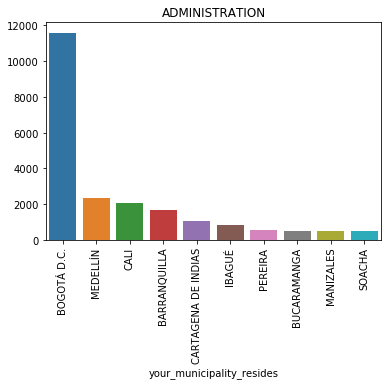

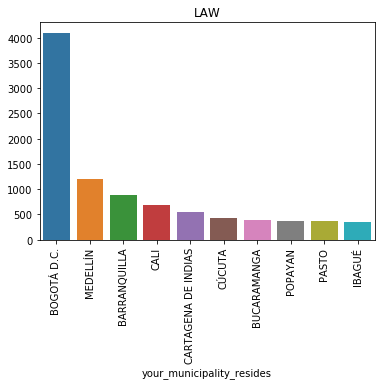

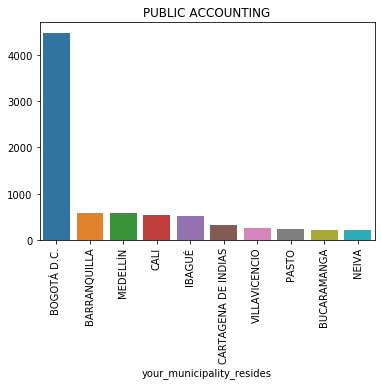

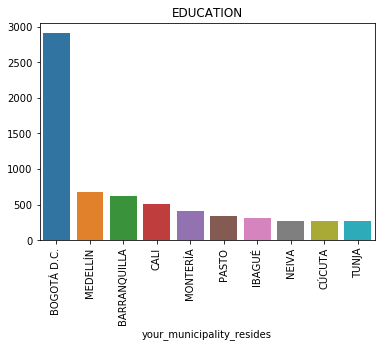

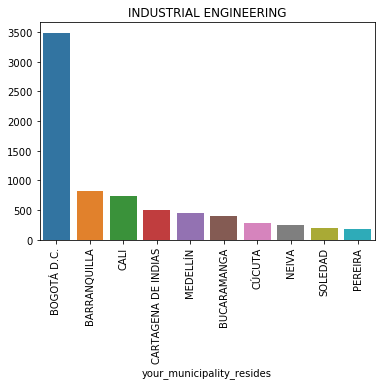

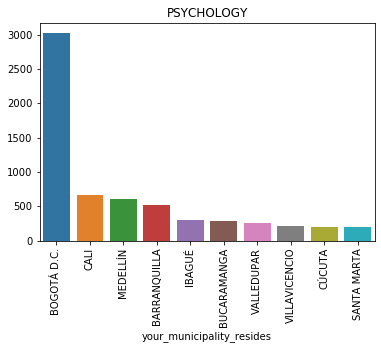

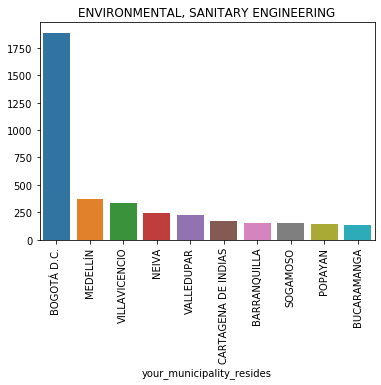

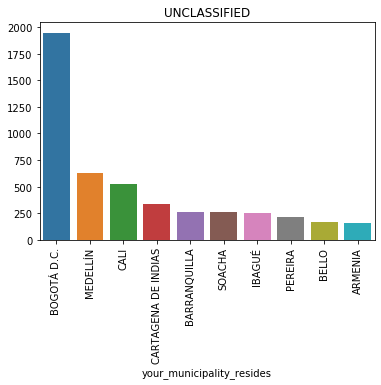

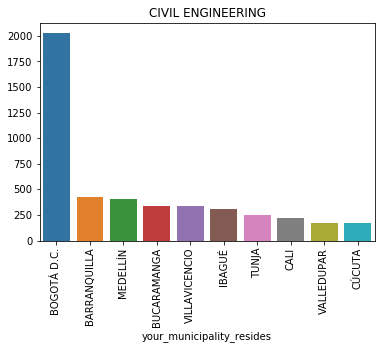

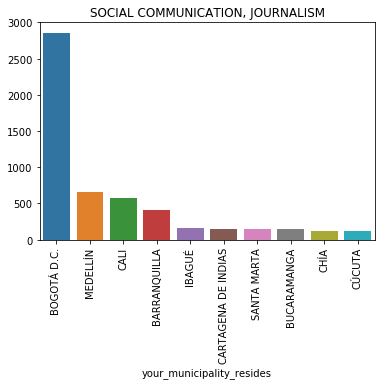

In [67]:
for i in top_10_undergraduate_cores_by_number: 
    plt.figure()
    sns.barplot(x = top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).index,  
                y=top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).values)
    plt.xticks(rotation=90)
    plt.title(i)

In [68]:
for i in top_10_undergraduate_cores_by_number:    
    # Checking for intersection between sets
    set1 = set(top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).index.to_list()) 
    intersection = set1.intersection(saber_pro_bot_50_municipalities)
    intersection_list = list(intersection)
    print("\nOut of the top 10 municipalities for {}, {} municipalities belong to the bottom 50 of saber pro scores".format(i, len(intersection_list)))


Out of the top 10 municipalities for ADMINISTRATION, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for LAW, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PUBLIC ACCOUNTING, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for EDUCATION, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for INDUSTRIAL ENGINEERING, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PSYCHOLOGY, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for ENVIRONMENTAL, SANITARY ENGINEERING, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for UNCLASSIFIED, 0 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for CIVIL ENGINEERING, 0 municipalit

#### It is very interesting to note that no municipalities belonging in the top 10 by undergraduate core by number belong to the bottom 50!

Does this mean these students belong to the Top municipalities despite having low mean scores?

In [69]:
for i in top_10_undergraduate_cores_by_number:    
    # Checking for intersection between sets
    set1 = set(top_10_undergraduate_cores_by_municipality[i].sort_values(ascending=False).head(10).index.to_list()) 
    intersection = set1.intersection(saber_pro_top_50_municipalities)
    intersection_list = list(intersection)
    print("\nOut of the top 10 municipalities for {}, {} municipalities belong to the bottom 50 of saber pro scores".format(i, len(intersection_list)))


Out of the top 10 municipalities for ADMINISTRATION, 2 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for LAW, 3 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PUBLIC ACCOUNTING, 3 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for EDUCATION, 4 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for INDUSTRIAL ENGINEERING, 2 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for PSYCHOLOGY, 2 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for ENVIRONMENTAL, SANITARY ENGINEERING, 1 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for UNCLASSIFIED, 1 municipalities belong to the bottom 50 of saber pro scores

Out of the top 10 municipalities for CIVIL ENGINEERING, 3 municipalit

#### Some of these students belong to the municipalities who supposedly has the highest scores in Saber Pro but their undergraduate cores are not that high in terms of mean scores. 

## Next Steps: 

1. Question: Why are students going to an undergraduate score with low mean Saber Pro scores when they belong to the municipalities that rank in the Top 50 in terms of Saber Pro scores?
2. Question: Where do the students who rank highest in terms of scores come from? Do they come from low municipalities? Does this mean students who have higher scores are underepresented? Are there students who got high scores but are affected by their social situation?
3. Question: Where do the students who belong to the majority live then? Maybe not the Top 50 but rather the Top 100? 200? Do they belong in the middle? 
4. Add analysis based on fami_dependents and fami_is_head
5. Add an analysis for institutions and ethnicity. Do the students from the top municipalities go to the top institutions and do the students from the bottom municipalities go to the low score-ranked institutions?
6. Show the distributions for Saber as well. Even though the correlations aren't as strong, it is still nice to put in visualization for Saber scores and not only Saber Pro.
7. Check students migration pattern. Are they migrating to cities with better education?
8. Perform Analysis on Departments as well. A department can contain municipalities so this is a higher level aggregation of analysis. 

Feel free to ask more questions! There is much more we can discover about the student population!